# 1. Perkenalan

**Nama**            : Zhaky Baridwan Triaji

**Batch**           : RMT-045

**Objective**       : 

Proyek ini bertujuan untuk membangun model machine learning yang mampu memprediksi tingkat kepuasan penumpang maskapai berdasarkan data survei dan informasi penerbangan. Hasil akhir yang diharapkan adalah sistem prediksi yang andal dan dapat digunakan secara otomatis untuk mengevaluasi kepuasan penumpang, sehingga dapat membantu maskapai dalam mengidentifikasi faktor-faktor yang memengaruhi kepuasan pelanggan dan mendukung pengambilan keputusan berbasis data.

**About Dataset**   :

Dataset ini berasal dari [Kaggle – Airline Passenger Satisfaction](https://www.kaggle.com/datasets/teejmahal20/airline-passenger-satisfaction/data) yang berisi data survei kepuasan penumpang maskapai penerbangan. Terdapat **25 kolom** yang mencakup informasi demografis penumpang, detail penerbangan, serta penilaian terhadap berbagai aspek layanan. Target (`satisfaction`) merupakan kategori yang menunjukkan apakah penumpang merasa **"satisfied"** atau **"neutral or dissatisfied"**. Dataset yang digunakan dalam proyek ini merupakan gabungan dari file `train.csv` dan `test.csv` yang tersedia di Kaggle, kemudian di-*split* ulang secara acak untuk keperluan pelatihan dan pengujian model.

---

# 2. Import Libraries

Pada bagian ini, akan di-*import* seluruh *library* yang digunakan dalam proyek, meliputi:
- *Library* untuk pengolahan data
- *Library* untuk visualisasi data
- *Library* untuk pemodelan dan evaluasi *machine learning*

Seluruh *library* akan dikumpulkan dalam satu *cell* agar rapi dan mudah dibaca.

In [10]:
# Library Pengolahan Data
# Import library
import matplotlib.pyplot as plt
import joblib
import numpy as np
import pandas as pd
import cloudpickle
import gzip
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer, make_column_selector
from sklearn.preprocessing import OneHotEncoder, StandardScaler, FunctionTransformer
from sklearn.impute import SimpleImputer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import cross_val_score, RandomizedSearchCV

# Library Visualisasi Data
# Import Library Evaluasi
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay

import warnings
warnings.filterwarnings('ignore')

---

# 3. Data Loading

Pada bagian ini dilakukan proses pemuatan (*loading*) dataset yang telah disiapkan sebelumnya, yaitu `dataset_airline.csv` yang merupakan gabungan dari `train.csv` dan `test.csv` dari sumber Kaggle.  

Tahapan pada bagian ini meliputi:
- Membaca file dataset
- Melihat sebagian isi dataset (*head* dan *tail*)
- Memeriksa informasi struktur dataset (`.info()`)
- Melihat ringkasan statistik deskriptif untuk kolom numerik (`.describe()`)
- Melakukan *quick check* kondisi data:
  - Jumlah *missing values* per kolom
  - Jumlah nilai unik per kolom
  - Jumlah data duplikat

Langkah-langkah ini bertujuan untuk mendapatkan gambaran awal mengenai isi, tipe data, dan kondisi dataset sebelum dilakukan eksplorasi data lebih lanjut di tahap EDA.

## 3.1 10 Data Teratas

In [11]:
# Import library yang dibutuhkan pada tahap ini
import pandas as pd

# Load dataset
df = pd.read_csv("dataset_airline.csv")

# Melihat 10 baris pertama
print("===== 10 Data Teratas =====")
display(df.head(10))

===== 10 Data Teratas =====


,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied
5,5,111157,Female,Loyal Customer,26,Personal Travel,Eco,1180,3,4,...,1,3,4,4,4,4,1,0,0.0,neutral or dissatisfied
6,6,82113,Male,Loyal Customer,47,Personal Travel,Eco,1276,2,4,...,2,3,3,4,3,5,2,9,23.0,neutral or dissatisfied
7,7,96462,Female,Loyal Customer,52,Business travel,Business,2035,4,3,...,5,5,5,5,4,5,4,4,0.0,satisfied
8,8,79485,Female,Loyal Customer,41,Business travel,Business,853,1,2,...,1,1,2,1,4,1,2,0,0.0,neutral or dissatisfied
9,9,65725,Male,disloyal Customer,20,Business travel,Eco,1061,3,3,...,2,2,3,4,4,3,2,0,0.0,neutral or dissatisfied


## 3.2 10 Data Terakhir

In [12]:
# Melihat 10 baris terakhir
print("\n===== 10 Data Terbawah =====")
display(df.tail(10))


===== 10 Data Terbawah =====


,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
129870,25966,30263,Male,disloyal Customer,42,Business travel,Eco,1024,4,4,...,3,3,1,2,2,3,3,0,17.0,neutral or dissatisfied
129871,25967,90347,Female,disloyal Customer,39,Business travel,Business,404,1,1,...,2,5,3,4,4,4,2,0,0.0,neutral or dissatisfied
129872,25968,86816,Male,Loyal Customer,41,Business travel,Eco,692,2,2,...,2,2,3,3,2,3,2,15,3.0,neutral or dissatisfied
129873,25969,120654,Male,Loyal Customer,52,Business travel,Business,280,3,3,...,4,4,4,4,3,4,3,0,0.0,satisfied
129874,25970,25309,Female,disloyal Customer,36,Business travel,Eco,432,1,5,...,4,5,2,5,2,3,4,0,0.0,neutral or dissatisfied
129875,25971,78463,Male,disloyal Customer,34,Business travel,Business,526,3,3,...,4,3,2,4,4,5,4,0,0.0,neutral or dissatisfied
129876,25972,71167,Male,Loyal Customer,23,Business travel,Business,646,4,4,...,4,4,5,5,5,5,4,0,0.0,satisfied
129877,25973,37675,Female,Loyal Customer,17,Personal Travel,Eco,828,2,5,...,2,4,3,4,5,4,2,0,0.0,neutral or dissatisfied
129878,25974,90086,Male,Loyal Customer,14,Business travel,Business,1127,3,3,...,4,3,2,5,4,5,4,0,0.0,satisfied
129879,25975,34799,Female,Loyal Customer,42,Personal Travel,Eco,264,2,5,...,1,1,2,1,1,1,1,0,0.0,neutral or dissatisfied


## 3.3 Informasi Struktur Dataset

In [13]:
# Informasi struktur dataset
print("\n===== Info Dataset =====")
df.info()


===== Info Dataset =====
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129880 entries, 0 to 129879
Data columns (total 25 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Unnamed: 0                         129880 non-null  int64  
 1   id                                 129880 non-null  int64  
 2   Gender                             129880 non-null  object 
 3   Customer Type                      129880 non-null  object 
 4   Age                                129880 non-null  int64  
 5   Type of Travel                     129880 non-null  object 
 6   Class                              129880 non-null  object 
 7   Flight Distance                    129880 non-null  int64  
 8   Inflight wifi service              129880 non-null  int64  
 9   Departure/Arrival time convenient  129880 non-null  int64  
 10  Ease of Online booking             129880 non-null  int64  
 11  Gate location

**Kesimpulan Hasil df.info()**

- Dataset memiliki total **129.880 baris** dan **25 kolom**.
- Tipe data terdiri dari:
  - **5 kolom bertipe object** (variabel kategorikal): `Gender`, `Customer Type`, `Type of Travel`, `Class`, dan `satisfaction`.
  - **19 kolom bertipe int64** (variabel numerik diskrit).
  - **1 kolom bertipe float64**: `Arrival Delay in Minutes`.
- Seluruh kolom memiliki data lengkap kecuali **`Arrival Delay in Minutes`** yang memiliki sedikit *missing values* (129.487 non-null dari 129.880 total baris → terdapat 393 data hilang).
- Kolom **`Unnamed: 0`** dan **`id`** kemungkinan merupakan kolom identifikasi, sehingga tidak akan berguna sebagai fitur prediksi dan dapat dihapus pada tahap *Feature Engineering*.
- Semua kolom kategorikal telah tersimpan sebagai `object`, namun nanti akan memerlukan encoding sebelum masuk ke model.
- Kolom `Arrival Delay in Minutes` bertipe float64, yang wajar karena mengandung nilai desimal pada menit keterlambatan.
- Ukuran dataset sekitar **24,8 MB**, relatif kecil sehingga aman diproses di memori lokal.

**Insight Awal:**
- Dataset bersih dari *null values* pada hampir semua kolom kecuali satu kolom yaitu `Arrival Delay in Minutes`.
- Perlu dilakukan handling missing value untuk kolom `Arrival Delay in Minutes` yang memiliki missing values, didasarkan pada analisis jenis missing value apakah MCAR, MAR, atau MNAR.
- Encoding kategorikal dan normalisasi skala pada fitur numerik akan menjadi bagian penting di tahap Feature Engineering.

## 3.4 Statistik Deskriptif Dataset

In [14]:
# Statistik deskriptif kolom numerik
print("\n===== Statistik Deskriptif =====")
display(df.describe())


===== Statistik Deskriptif =====


,Unnamed: 0,id,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
count,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129487.000000
mean,44158.700000,64940.500000,39.427957,1190.316392,2.728696,3.057599,2.756876,2.976925,3.204774,3.252633,3.441361,3.358077,3.383023,3.350878,3.632114,3.306267,3.642193,3.286326,14.713713,15.091129
std,31207.377062,37493.270818,15.119360,997.452477,1.329340,1.526741,1.401740,1.278520,1.329933,1.350719,1.319289,1.334049,1.287099,1.316252,1.180025,1.266185,1.176669,1.313682,38.071126,38.465650
min,0.000000,1.000000,7.000000,31.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,16234.750000,32470.750000,27.000000,414.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,3.000000,3.000000,2.000000,0.000000,0.000000
50%,38963.500000,64940.500000,40.000000,844.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,3.000000,0.000000,0.000000
75%,71433.250000,97410.250000,51.000000,1744.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000,4.000000,5.000000,4.000000,5.000000,4.000000,12.000000,13.000000
max,103903.000000,129880.000000,85.000000,4983.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1592.000000,1584.000000


**Kesimpulan Hasil df.describe()**

- **Kolom `Age`**:  
  - Rentang usia penumpang antara 7 hingga 85 tahun, dengan median di 40 tahun.
  - Usia 7 tahun mengindikasikan adanya penumpang anak-anak.

- **Kolom `Flight Distance`**:  
  - Jarak penerbangan berkisar 31 hingga 4.983 mil, median 844 mil.
  - Variasi ini menunjukkan data mencakup penerbangan jarak pendek hingga jarak jauh.

- **Kolom penilaian layanan (skala 0–5)** seperti `Inflight wifi service`, `Seat comfort`, `Food and drink`, dll.:  
  - Nilai minimum 0 (kemungkinan responden tidak memberikan penilaian atau layanan tidak tersedia).  
  - Nilai maksimum 5 sebagai skor tertinggi.
  - Skor rata-rata sebagian besar fitur berada di kisaran 2,7–3,6, menunjukkan variasi persepsi layanan.

- **Kolom `Departure Delay in Minutes` & `Arrival Delay in Minutes`**:  
  - Sebagian besar penerbangan memiliki median keterlambatan 0 menit (tidak terlambat).
  - Namun, keterlambatan ekstrem terlihat hingga 1.592 menit (departure) dan 1.584 menit (arrival), yang berpotensi sebagai outlier.
  - Nilai mean lebih tinggi dari median karena distribusi condong ke kanan (skewed).

- **Kolom `id` dan `Unnamed: 0`**:  
  - Nilai berurutan dari 1 hingga 129.880, berperan sebagai identifikasi unik.
  - Tidak memiliki makna prediktif sehingga kemungkinan akan dihapus.

**Insight Awal:**
- Banyak fitur menggunakan skala ordinal 0–5 yang nanti perlu diperlakukan hati-hati dalam preprocessing.
- Adanya nilai ekstrem pada delay memerlukan penanganan khusus untuk menghindari distorsi pada model.
- Skor rata-rata layanan berada di sekitar angka netral (3), mengindikasikan peluang peningkatan layanan bagi maskapai.
- Nilai minimum 0 pada fitur layanan dapat merepresentasikan ketidakpuasan total atau ketiadaan layanan.

## 3.5 Unique Values Dataset

In [15]:
# Quick check nilai unik tiap kolom
print("\n===== Jumlah Nilai Unik Tiap Kolom =====")
print(df.nunique())


===== Jumlah Nilai Unik Tiap Kolom =====
Unnamed: 0                           103904
id                                   129880
Gender                                    2
Customer Type                             2
Age                                      75
Type of Travel                            2
Class                                     3
Flight Distance                        3821
Inflight wifi service                     6
Departure/Arrival time convenient         6
Ease of Online booking                    6
Gate location                             6
Food and drink                            6
Online boarding                           6
Seat comfort                              6
Inflight entertainment                    6
On-board service                          6
Leg room service                          6
Baggage handling                          5
Checkin service                           6
Inflight service                          6
Cleanliness                       

**Kesimpulan Hasil df.nunique()**

- **Kolom ID dan Index**:  
  - `id` memiliki 129.880 nilai unik (setiap baris unik → ID absolut).  
  - `Unnamed: 0` memiliki 103.904 nilai unik, kemungkinan indeks dari dataset asal.  
  - Keduanya tidak mengandung informasi prediktif dan berpotensi dihapus.

- **Kolom Kategorikal dengan Kardinalitas Rendah**:  
  - `Gender` (2 kategori), `Customer Type` (2 kategori), `Type of Travel` (2 kategori), `Class` (3 kategori), `satisfaction` (2 kategori). Fitur ini mudah di-*encode* dengan teknik sederhana seperti One-Hot Encoding.
  - `Age`, `Flight Distance`, `Departure Delay in Minutes`, dan `Arrival Delay in Minutes` merupakan kolom numerik kontinyu dengan kardinalitas sangat tinggi, sehingga akan memberatkan komputasi apabila tidak disederhanakan.

- **Kolom Ordinal / Skala Layanan**:  
  - Mayoritas fitur penilaian layanan (`Inflight wifi service`, `Gate location`, `Seat comfort`, dll.) hanya memiliki 5–6 nilai unik.  
  - Nilai tambahan di luar 1–5 kemungkinan adalah 0 (tidak ada layanan/penilaian) atau nilai skala tambahan.

- **Kolom Numerik Non-Kategorikal**:  
  - `Age`: 75 nilai unik → meski diskrit, rentang cukup besar untuk dianggap numerik kontinyu.  
  - `Flight Distance`: 3.821 nilai unik → sangat variatif, numerik kontinyu.  
  - `Departure Delay in Minutes`: 466 nilai unik → distribusi delay cukup bervariasi, potensial mengandung outlier.  
  - `Arrival Delay in Minutes`: 472 nilai unik, sedikit *missing values* → juga mengandung variasi tinggi.


## 3.6 Duplicated Data

In [16]:
# Quick check duplikasi data
print("\n===== Jumlah Duplikasi =====")
print(df.duplicated().sum())


===== Jumlah Duplikasi =====
0


**Kesimpulan Hasil Pengecekan Duplikasi**

- Tidak ditemukan baris duplikat pada dataset (`0` duplikasi).
- Hal ini menunjukkan bahwa setiap baris data merepresentasikan entri unik, sehingga tidak diperlukan proses penghapusan data ganda pada tahap awal ini.

---

# 4. Exploratory Data Analysis (EDA)

Pada bagian ini dilakukan eksplorasi awal terhadap dataset untuk memahami karakteristik data, distribusi variabel, hubungan antar fitur, dan pola yang mungkin memengaruhi target prediksi (`satisfaction`).  

Tahapan pada EDA akan mencakup:
- Analisis Korelasi Fitur terhadap Target
- Analisis Univariat
- Analisis Bivariat terhadap Target
- Pemeriksaan Missing Values dan Pola Kemunculannya
- Analisis Distribusi dan Deteksi Outlier
- Analisis Multivariat

Hasil EDA ini akan menjadi dasar dalam pengambilan keputusan pada tahap *Feature Engineering* dan pemodelan.


## 4.1 Korelasi Features dengan Target

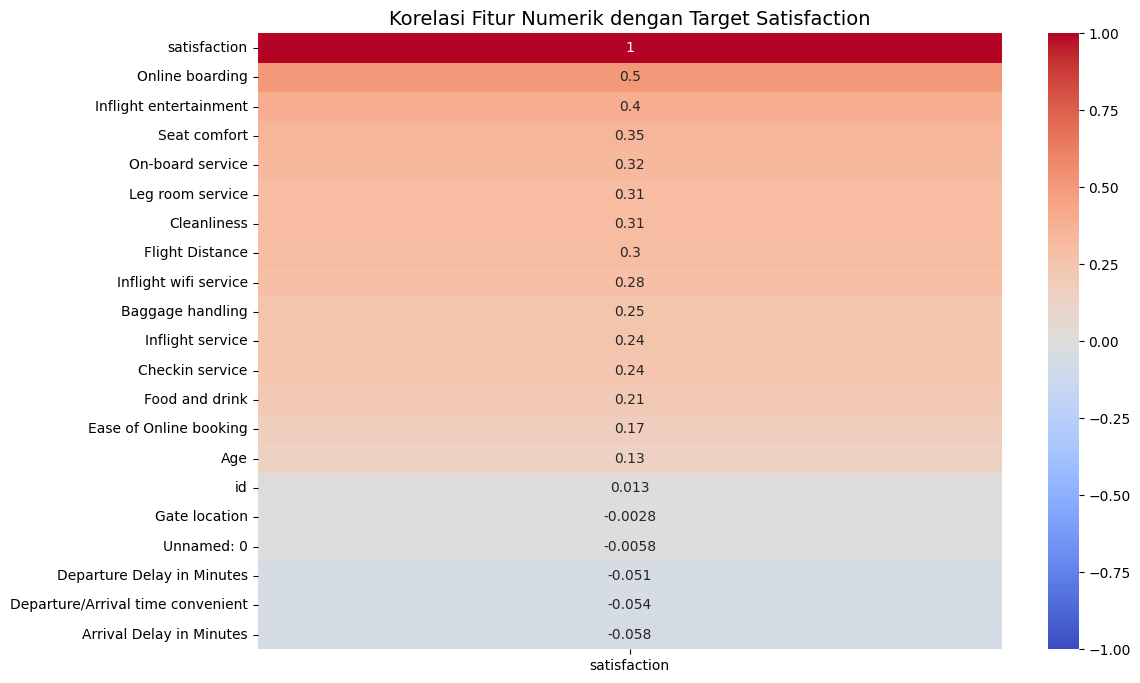

In [17]:
# Import library
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Encode target satisfaction menjadi 0 (neutral or dissatisfied) dan 1 (satisfied)
df_encoded = df.copy()
df_encoded['satisfaction'] = df_encoded['satisfaction'].map({
    'neutral or dissatisfied': 0,
    'satisfied': 1
})

# Pilih hanya kolom numerik
numeric_cols = df_encoded.select_dtypes(include=[np.number]).columns.tolist()

# Hitung korelasi
corr_matrix = df_encoded[numeric_cols].corr()

# Plot heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(
    corr_matrix[['satisfaction']].sort_values(by='satisfaction', ascending=False),
    annot=True, cmap='coolwarm', vmin=-1, vmax=1
)
plt.title('Korelasi Fitur Numerik dengan Target Satisfaction', fontsize=14)
plt.show()

### Kesimpulan Korelasi Fitur Numerik dengan Target *Satisfaction*

Berdasarkan perhitungan korelasi Pearson antara seluruh fitur numerik dan target `satisfaction`, diperoleh temuan berikut:

1. **Fitur dengan Korelasi Tinggi terhadap Kepuasan Penumpang**  
   - **Online boarding** memiliki korelasi paling tinggi (0.50), menunjukkan bahwa kemudahan dan kualitas proses *online boarding* berkontribusi signifikan terhadap kepuasan pelanggan.  
   - **Inflight entertainment** (0.40), **Seat comfort** (0.35), **On-board service** (0.32), **Leg room service** (0.31), dan **Cleanliness** (0.31) juga memiliki korelasi moderat, menandakan bahwa pengalaman selama penerbangan (kenyamanan kursi, ruang kaki, layanan awak kabin, dan kebersihan) mempengaruhi tingkat kepuasan.

2. **Fitur dengan Korelasi Rendah–Sedang**  
   - **Flight Distance** (0.30) menunjukkan hubungan positif, meskipun secara logis jarak penerbangan tidak memengaruhi kepuasan secara langsung, namun bisa menjadi indikator kualitas layanan di penerbangan jarak jauh.  
   - **Inflight wifi service** (0.28) dan **Baggage handling** (0.25) memiliki pengaruh sedang.  
   - **Ease of Online booking** (0.17) dan **Age** (0.13) memiliki pengaruh rendah, yang berarti preferensi ini bervariasi antar kelompok pelanggan.

3. **Fitur Hampir Tidak Berpengaruh**  
   - **Gate location** (-0.003) memiliki korelasi hampir nol, sehingga kemungkinan besar tidak signifikan dalam prediksi kepuasan.  
   - **ID** (0.013) dan **Unnamed: 0** (-0.006) hanya merupakan pengenal data dan tidak relevan sebagai prediktor.

4. **Fitur dengan Korelasi Negatif**  
   - **Departure Delay** (-0.05), **Arrival Delay** (-0.058), dan **Departure/Arrival time convenient** (-0.054) menunjukkan hubungan negatif, meskipun korelasinya lemah.  
   - Hal ini konsisten dengan logika bisnis: semakin besar keterlambatan atau ketidaknyamanan jadwal, semakin rendah tingkat kepuasan.

**Implikasi Bisnis:**  
Fitur layanan langsung yang berinteraksi dengan penumpang selama penerbangan (boarding, hiburan, kenyamanan kursi, ruang kaki, layanan awak kabin, dan kebersihan) memiliki pengaruh terbesar terhadap kepuasan. Oleh karena itu, maskapai sebaiknya memprioritaskan investasi pada peningkatan pengalaman penerbangan untuk meningkatkan *customer satisfaction*.  
Sementara itu, faktor seperti keterlambatan jadwal meskipun pengaruhnya tidak sebesar fitur layanan, tetap harus diperhatikan untuk mencegah potensi ketidakpuasan.

## 4.2 Analisis Univariat dan Distribusi Data

Pada tahap ini akan dilakukan analisis terhadap masing-masing variabel secara terpisah untuk memahami karakteristik distribusinya.  
Analisis univariat ini akan dibagi menjadi dua kelompok utama:

1. **Fitur Kategorikal**  
   - Menampilkan jumlah dan proporsi tiap kategori.
   - Membuat visualisasi *countplot* untuk melihat dominasi kategori tertentu.

2. **Fitur Numerikal**  
   - Menampilkan statistik deskriptif.
   - Membuat visualisasi histogram atau *boxplot* untuk melihat distribusi, sebaran data, dan potensi *outlier*.

Hasil dari analisis univariat ini akan membantu mengidentifikasi:
- Pola distribusi yang tidak seimbang.
- Kategori yang jarang muncul.
- Variabel numerik yang memerlukan transformasi atau penanganan *outlier*.

=== Analisis Fitur Kategorikal ===

Kolom: Gender
Gender
Female    65899
Male      63981
Name: count, dtype: int64

Proporsi (%):
Gender
Female    50.74
Male      49.26
Name: proportion, dtype: float64


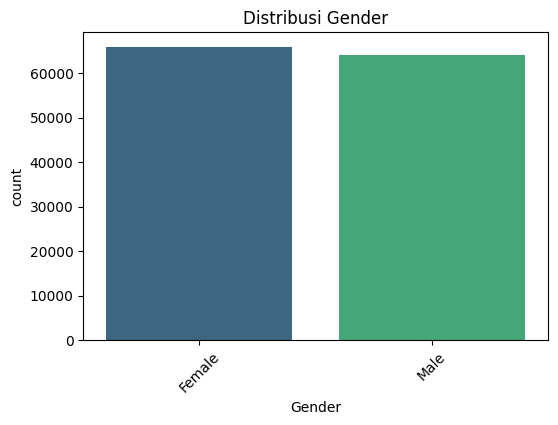


Kolom: Customer Type
Customer Type
Loyal Customer       106100
disloyal Customer     23780
Name: count, dtype: int64

Proporsi (%):
Customer Type
Loyal Customer       81.69
disloyal Customer    18.31
Name: proportion, dtype: float64


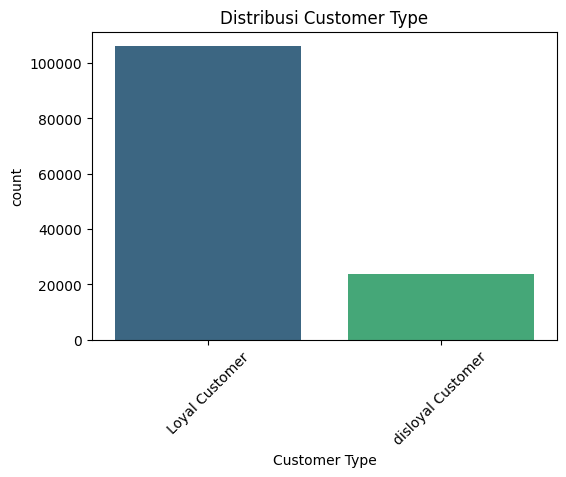


Kolom: Type of Travel
Type of Travel
Business travel    89693
Personal Travel    40187
Name: count, dtype: int64

Proporsi (%):
Type of Travel
Business travel    69.06
Personal Travel    30.94
Name: proportion, dtype: float64


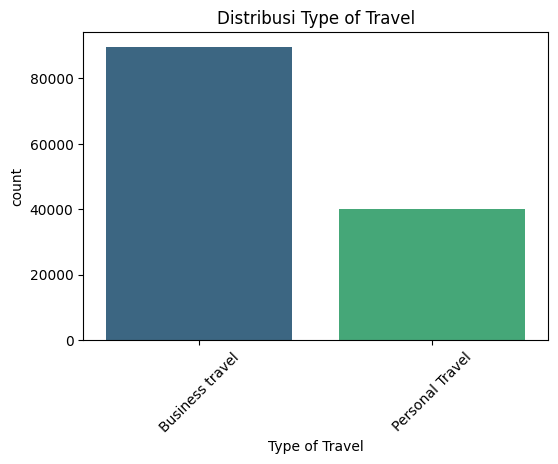


Kolom: Class
Class
Business    62160
Eco         58309
Eco Plus     9411
Name: count, dtype: int64

Proporsi (%):
Class
Business    47.86
Eco         44.89
Eco Plus     7.25
Name: proportion, dtype: float64


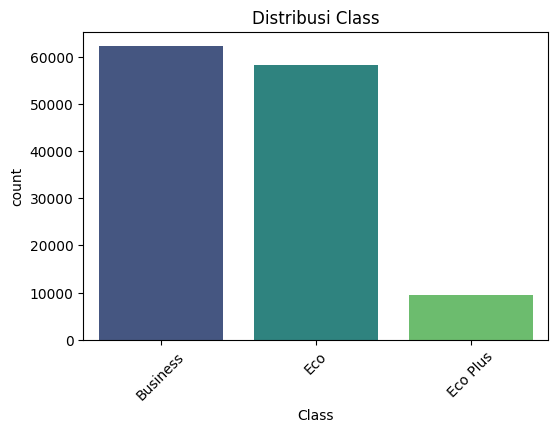


Kolom: satisfaction
satisfaction
neutral or dissatisfied    73452
satisfied                  56428
Name: count, dtype: int64

Proporsi (%):
satisfaction
neutral or dissatisfied    56.55
satisfied                  43.45
Name: proportion, dtype: float64


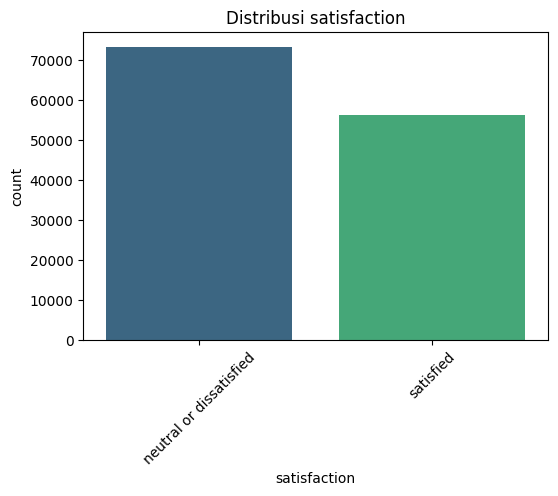


=== Analisis Fitur Numerikal ===


,Unnamed: 0,id,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
count,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129487.000000
mean,44158.700000,64940.500000,39.427957,1190.316392,2.728696,3.057599,2.756876,2.976925,3.204774,3.252633,3.441361,3.358077,3.383023,3.350878,3.632114,3.306267,3.642193,3.286326,14.713713,15.091129
std,31207.377062,37493.270818,15.119360,997.452477,1.329340,1.526741,1.401740,1.278520,1.329933,1.350719,1.319289,1.334049,1.287099,1.316252,1.180025,1.266185,1.176669,1.313682,38.071126,38.465650
min,0.000000,1.000000,7.000000,31.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,16234.750000,32470.750000,27.000000,414.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,3.000000,3.000000,2.000000,0.000000,0.000000
50%,38963.500000,64940.500000,40.000000,844.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,3.000000,0.000000,0.000000
75%,71433.250000,97410.250000,51.000000,1744.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000,4.000000,5.000000,4.000000,5.000000,4.000000,12.000000,13.000000
max,103903.000000,129880.000000,85.000000,4983.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1592.000000,1584.000000


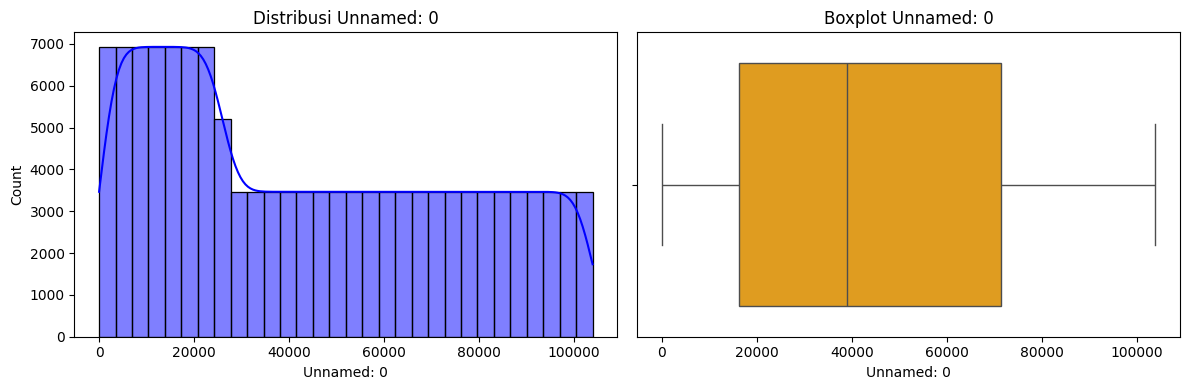

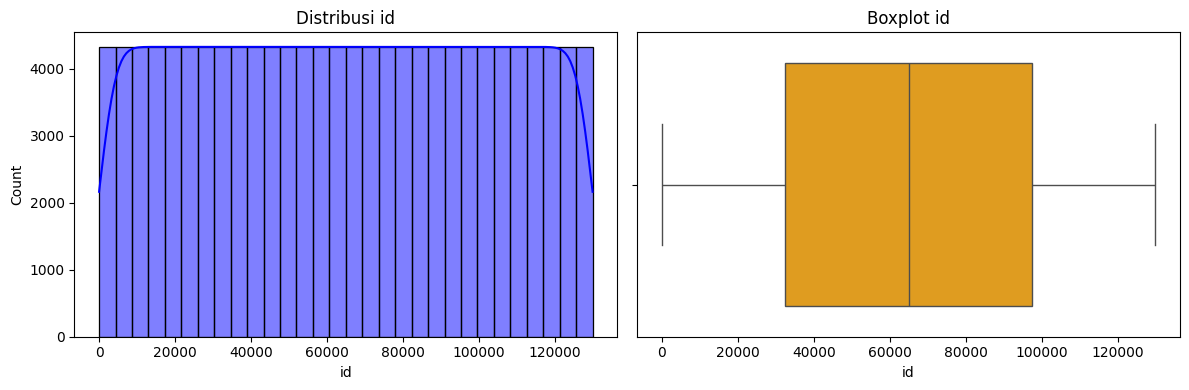

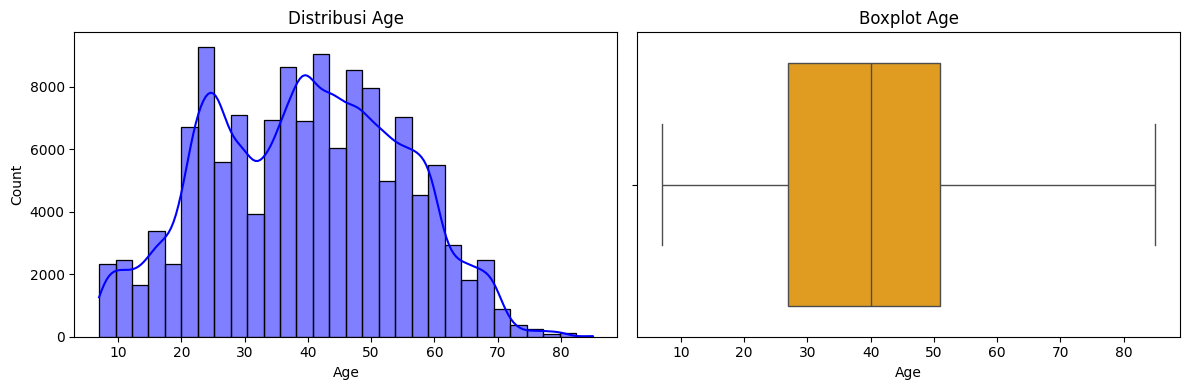

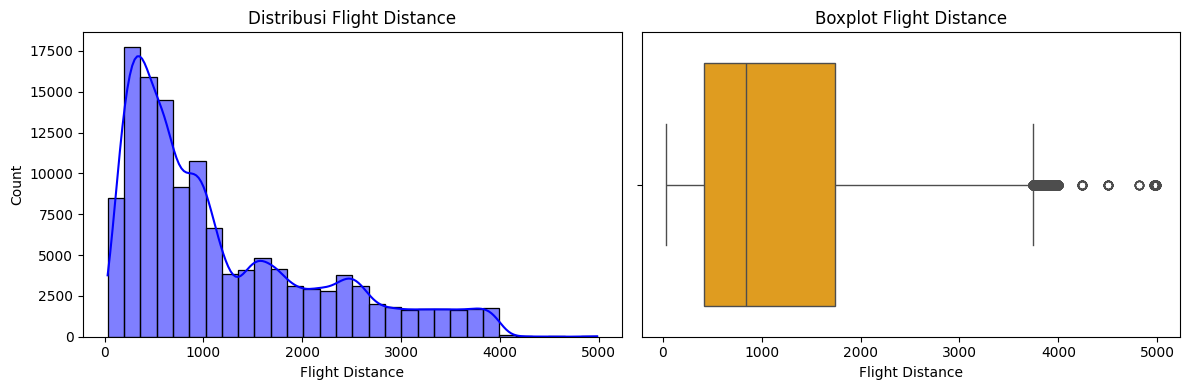

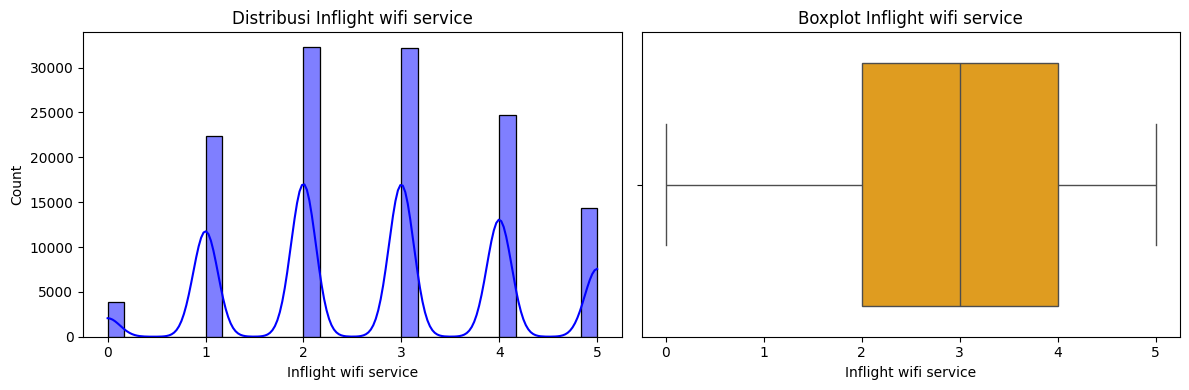

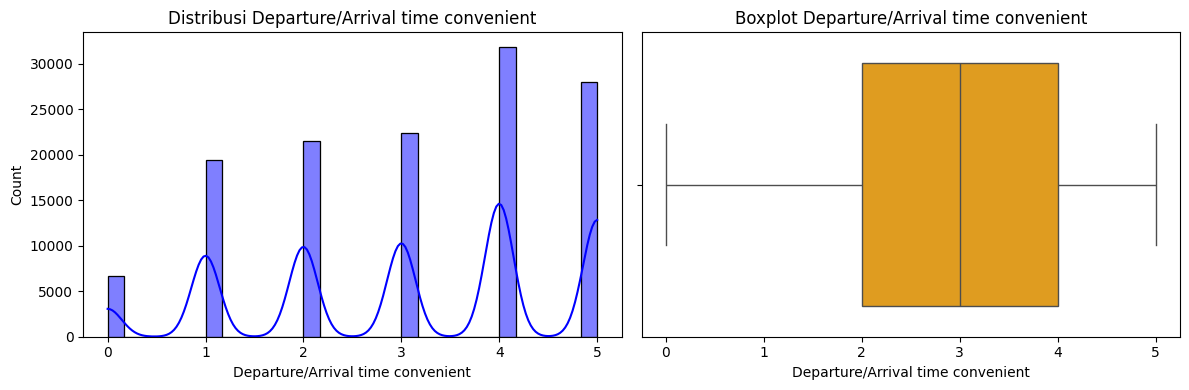

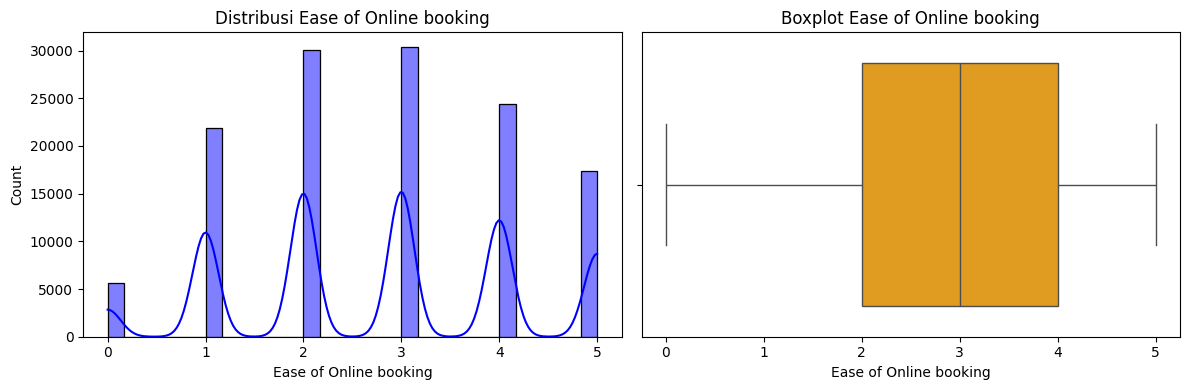

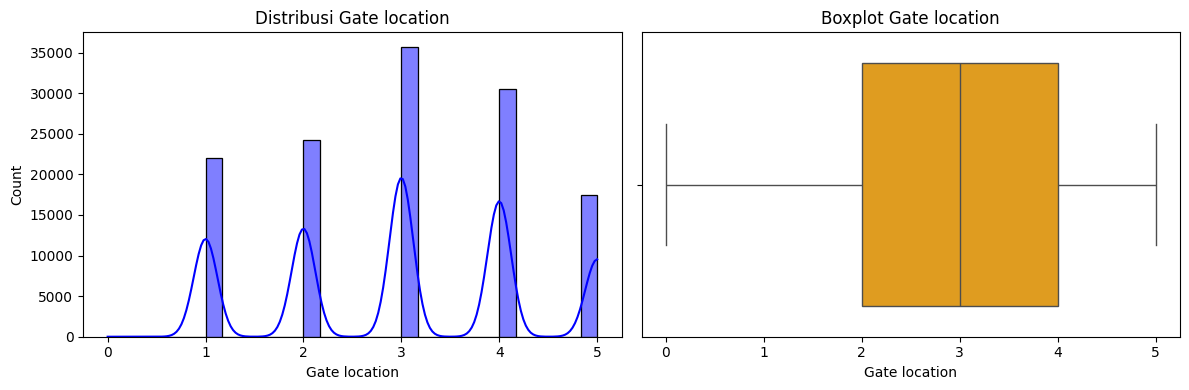

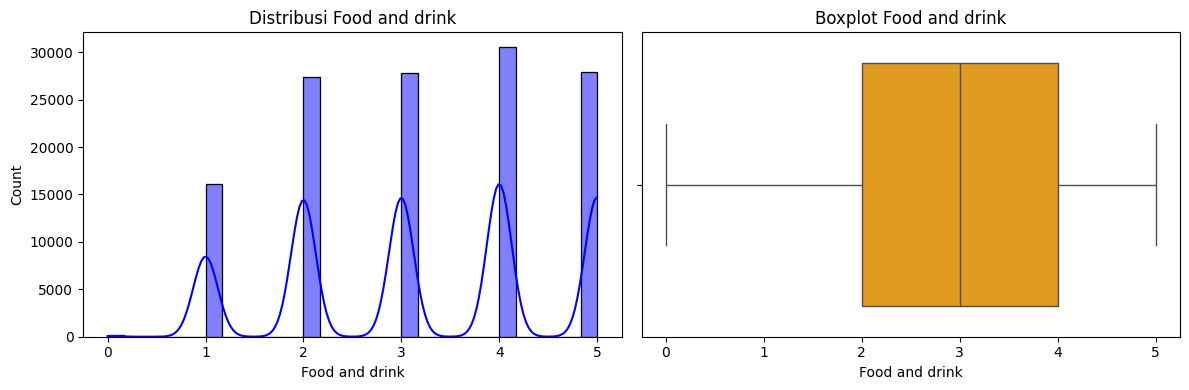

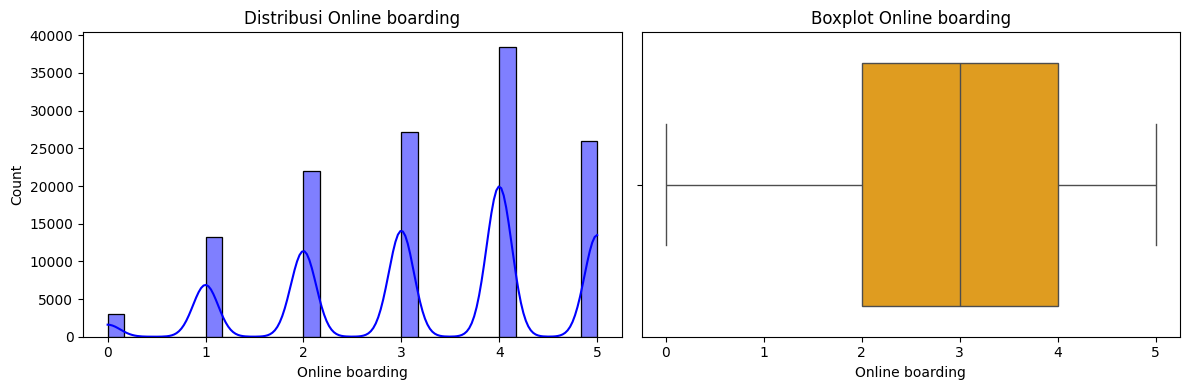

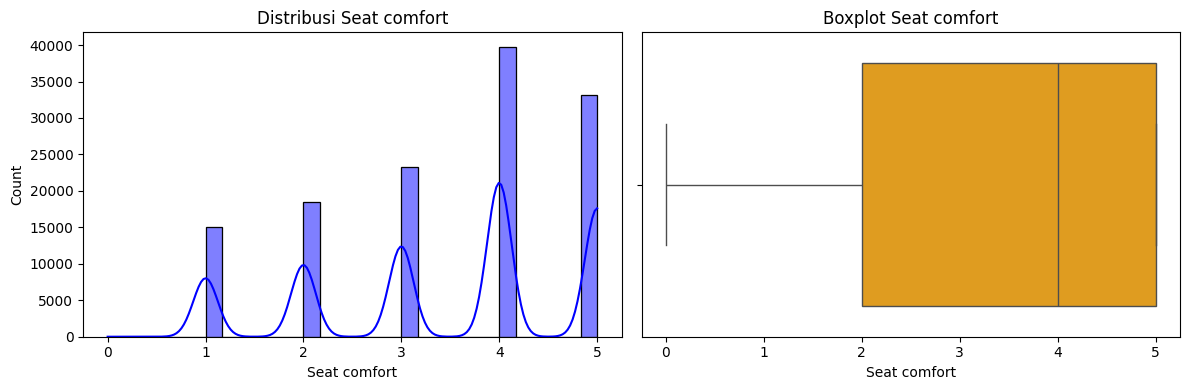

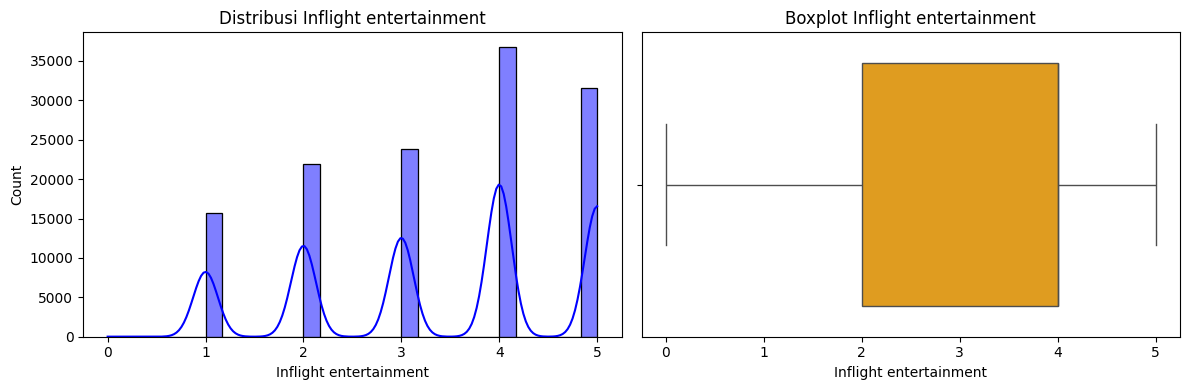

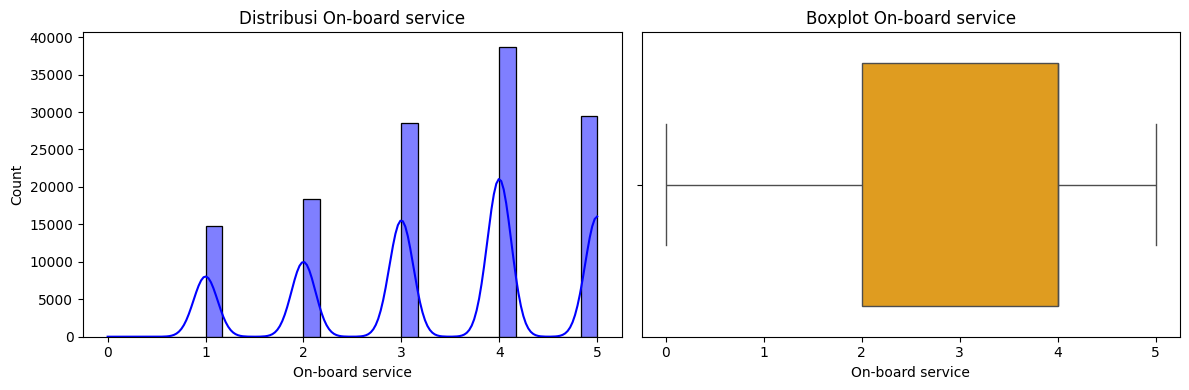

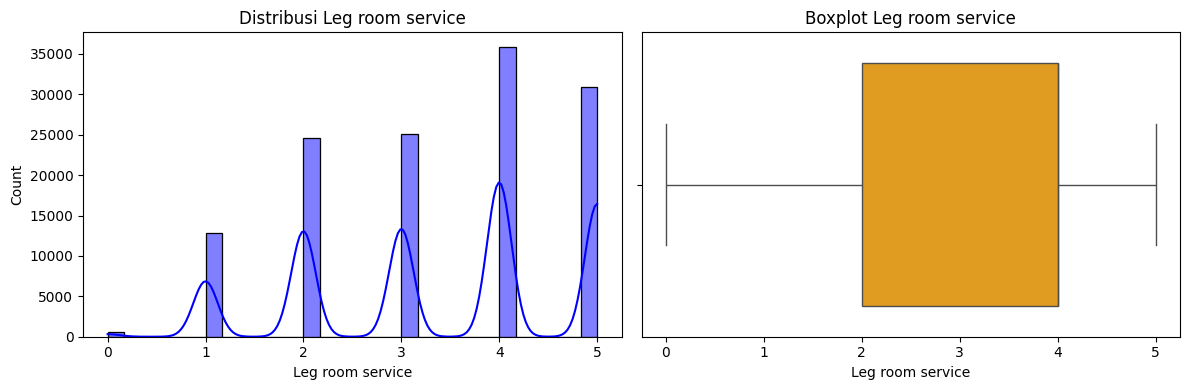

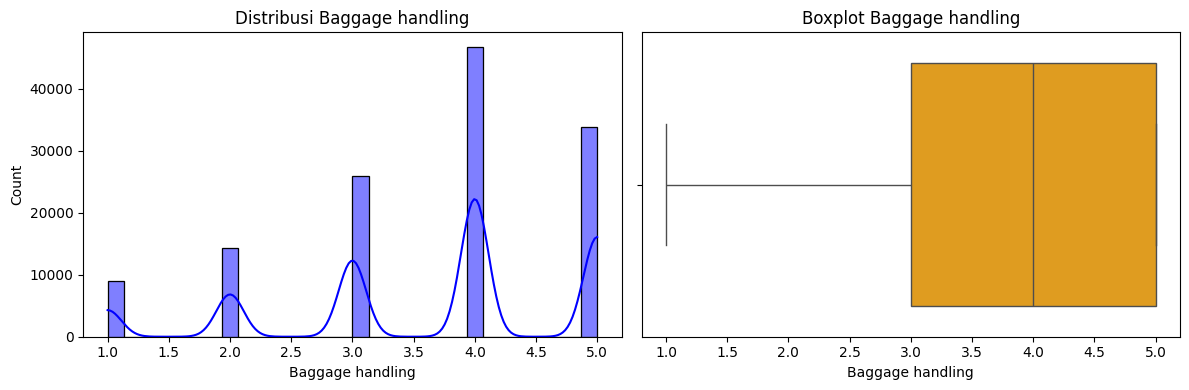

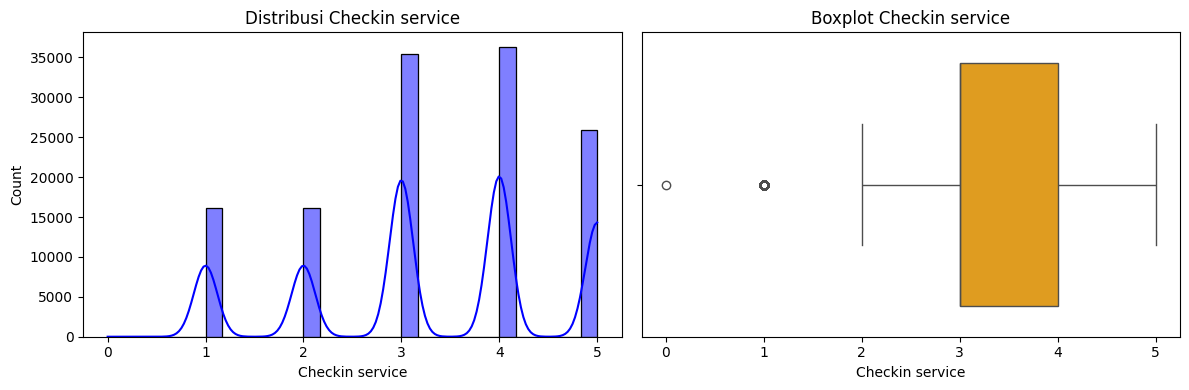

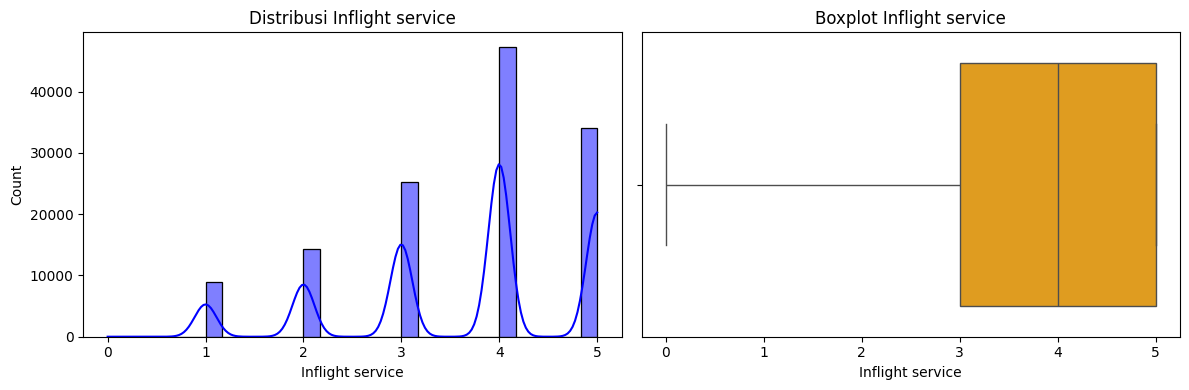

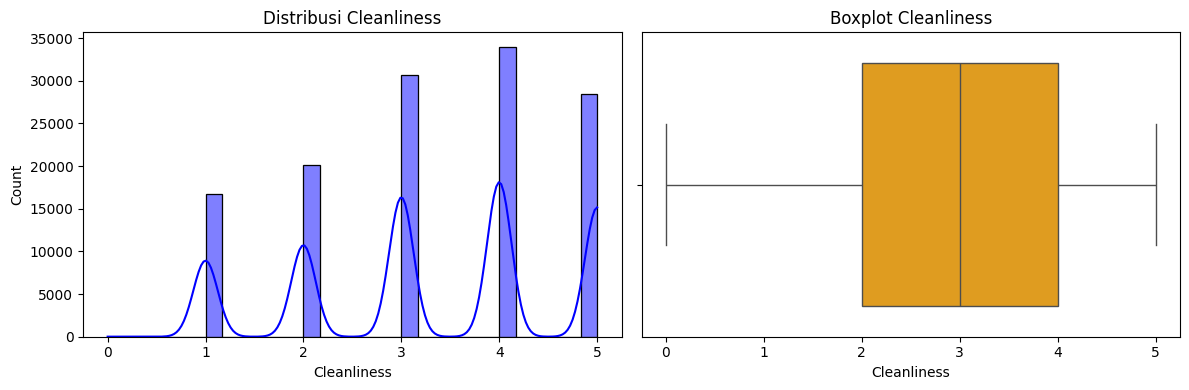

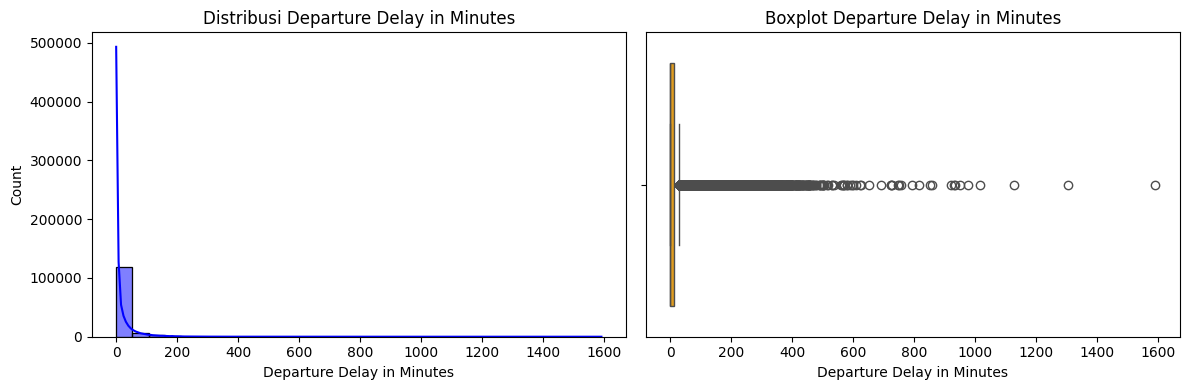

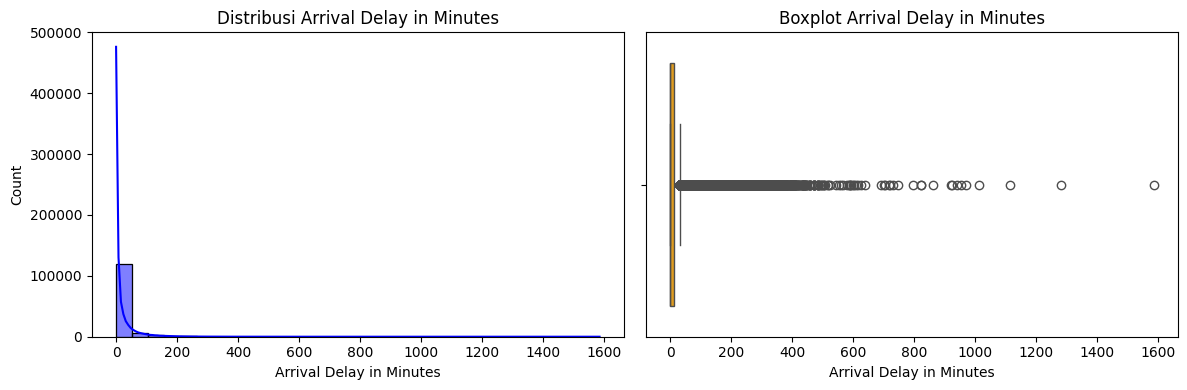

In [18]:
# Import library yang dibutuhkan untuk tahap ini
import matplotlib.pyplot as plt
import seaborn as sns

# Pisahkan kolom kategorikal dan numerikal
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()

# Analisis Fitur Kategorikal
print("=== Analisis Fitur Kategorikal ===")
for col in categorical_cols:
    print(f"\nKolom: {col}")
    print(df[col].value_counts())
    print("\nProporsi (%):")
    print(round(df[col].value_counts(normalize=True) * 100, 2))

    # Visualisasi countplot
    plt.figure(figsize=(6,4))
    sns.countplot(data=df, x=col, order=df[col].value_counts().index, palette="viridis")
    plt.title(f'Distribusi {col}')
    plt.xticks(rotation=45)
    plt.show()

# Analisis Fitur Numerikal
print("\n=== Analisis Fitur Numerikal ===")
display(df[numerical_cols].describe())

for col in numerical_cols:
    plt.figure(figsize=(12,4))

    # Histogram
    plt.subplot(1, 2, 1)
    sns.histplot(df[col], kde=True, color="blue", bins=30)
    plt.title(f'Distribusi {col}')

    # Boxplot
    plt.subplot(1, 2, 2)
    sns.boxplot(x=df[col], color="orange")
    plt.title(f'Boxplot {col}')

    plt.tight_layout()
    plt.show()

**Kesimpulan Analisis Univariat**

- **Distribusi Target (`satisfaction`)**:  
  - Kategori *neutral or dissatisfied* mendominasi dengan 56,55% penumpang, sedangkan *satisfied* hanya 43,45%.  
  - Dari perspektif bisnis, ini menunjukkan lebih dari setengah penumpang memiliki tingkat kepuasan yang rendah atau netral, yang berpotensi memengaruhi reputasi maskapai dan loyalitas pelanggan.  
  - Ketidakseimbangan kelas relatif moderat, sehingga **masih bisa ditangani model tanpa teknik balancing**.

- **Fitur Demografis**:  
  - `Gender` hampir seimbang (50,74% perempuan, 49,26% laki-laki) → tidak ada indikasi bias besar berbasis gender.  
  - `Customer Type` menunjukkan dominasi *loyal customer* (81,69%), yang berarti retensi pelanggan tinggi namun memerlukan strategi menjaga kepuasan agar loyalitas tidak menurun.  
  - `Type of Travel` didominasi perjalanan bisnis (69,06%) → layanan maskapai perlu fokus menjaga kualitas untuk segmen ini.  
  - `Class` terbagi cukup merata antara *Business* (47,86%) dan *Economy* (44,89%), dengan *Eco Plus* hanya 7,25%.

- **Fitur Numerikal**:  
  - `Age` memiliki distribusi normal dengan dua puncak (sekitar usia 30-an dan 50-an), menunjukkan dua segmen usia dominan.  
  - `Flight Distance` *skewed* ke kiri → mayoritas penerbangan berjarak pendek-menengah, dengan sedikit penerbangan jarak jauh.  
  - Sebagian besar fitur layanan (*Inflight wifi service*, *Seat comfort*, dll.) *skewed* ke kanan namun tidak ekstrem, artinya mayoritas penumpang memberi penilaian positif, namun ada kelompok kecil yang memberi nilai sangat rendah.
  - `Departure Delay in Minutes` dan `Arrival Delay in Minutes` *skewed* ke kiri dengan outlier ekstrem di sisi kanan (hingga >1500 menit), menandakan kejadian keterlambatan ekstrem meskipun jarang, sangat memengaruhi kepuasan.

**Implikasi Bisnis**:
- Proporsi ketidakpuasan yang tinggi menandakan peluang perbaikan signifikan, terutama pada layanan yang bernilai tinggi bagi segmen bisnis.  
- Keterlambatan ekstrem meskipun jarang, dapat merusak persepsi kualitas layanan secara drastis.  
- Segmentasi berdasarkan tipe perjalanan dan kelas layanan berpotensi menjadi strategi personalisasi untuk meningkatkan kepuasan pelanggan.

## 4.3 Analisis Bivariat terhadap Target

Pada tahap ini akan dilakukan analisis hubungan antara masing-masing fitur dengan variabel target (`satisfaction`).  
Tujuan dari analisis ini adalah untuk mengidentifikasi fitur mana yang memiliki pengaruh atau korelasi paling kuat terhadap tingkat kepuasan penumpang.

Pendekatan yang digunakan:
- Untuk **fitur kategorikal**:  
  - Menggunakan *countplot* terpisah berdasarkan kategori target.  
  - Melihat distribusi proporsi `satisfaction` di setiap kategori.

- Untuk **fitur numerikal**:  
  - Menggunakan *boxplot* atau *violin plot* untuk membandingkan distribusi nilai numerik pada masing-masing kategori target.
  - Melihat potensi perbedaan signifikan pada distribusi antar kelompok.

Hasil dari analisis ini akan menjadi dasar pertimbangan dalam proses pemilihan fitur pada tahap *Feature Engineering*.

=== Analisis Bivariat: Fitur Kategorikal ===

Kolom: Gender


satisfaction,neutral or dissatisfied,satisfied
Gender,,
Female,57.10,42.90
Male,55.99,44.01


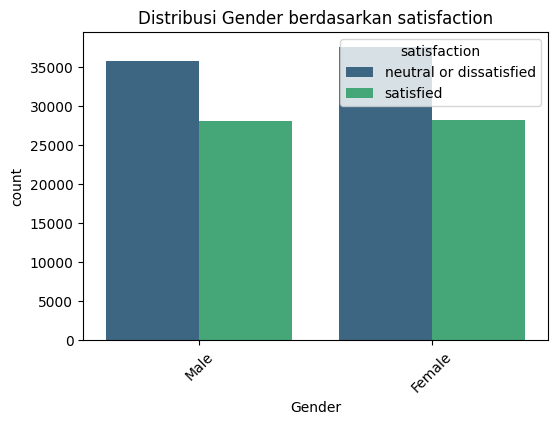


Kolom: Customer Type


satisfaction,neutral or dissatisfied,satisfied
Customer Type,,
Loyal Customer,52.19,47.81
disloyal Customer,76.03,23.97


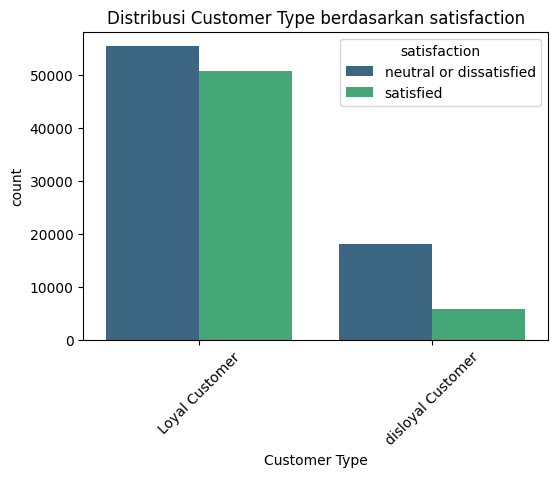


Kolom: Type of Travel


satisfaction,neutral or dissatisfied,satisfied
Type of Travel,,
Business travel,41.63,58.37
Personal Travel,89.87,10.13


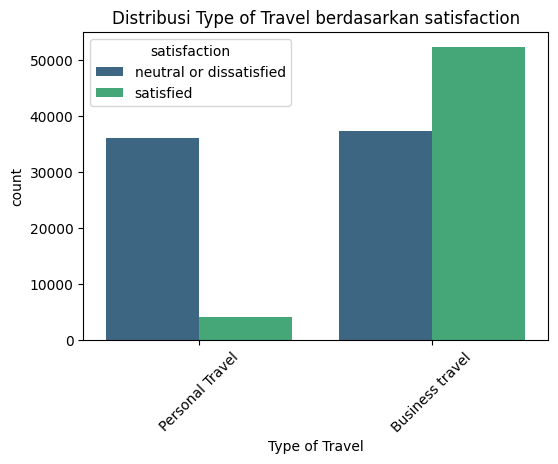


Kolom: Class


satisfaction,neutral or dissatisfied,satisfied
Class,,
Business,30.56,69.44
Eco,81.23,18.77
Eco Plus,75.36,24.64


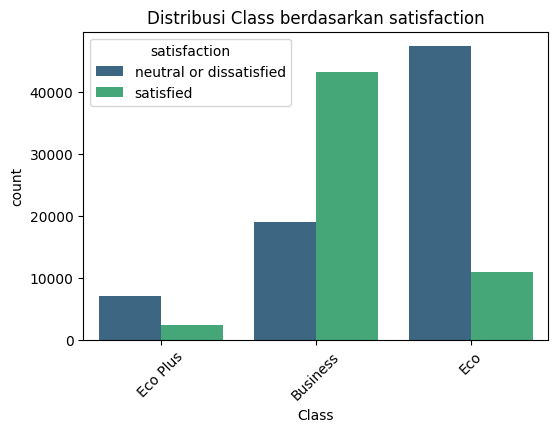


=== Analisis Bivariat: Fitur Numerikal ===


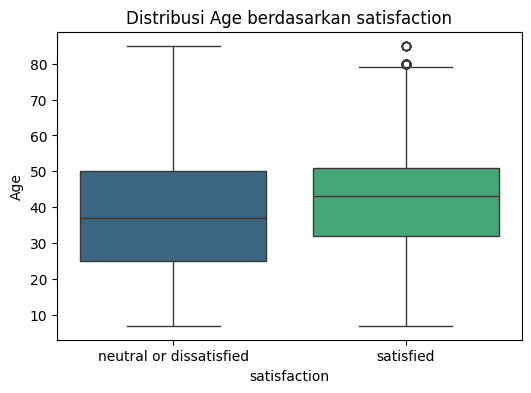

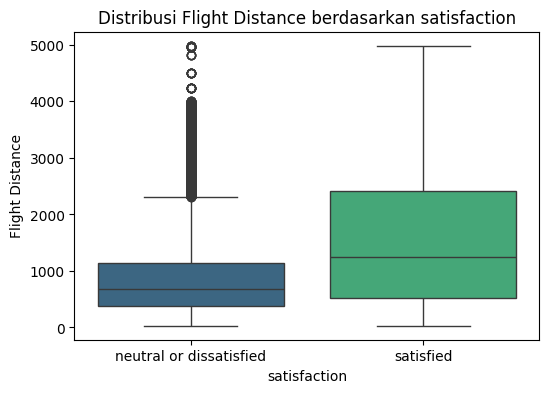

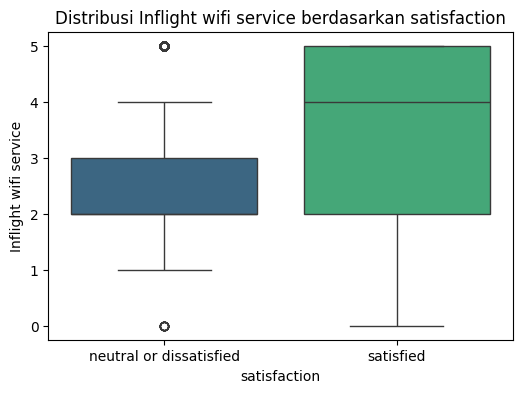

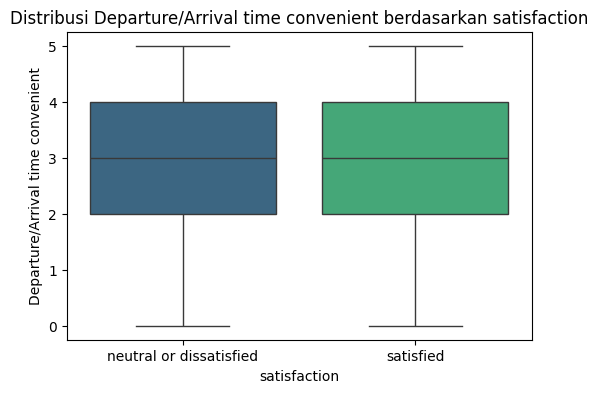

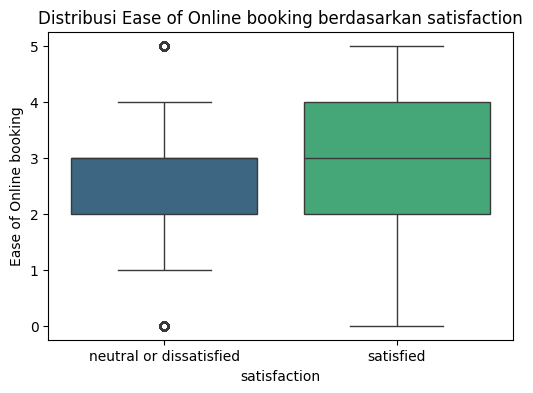

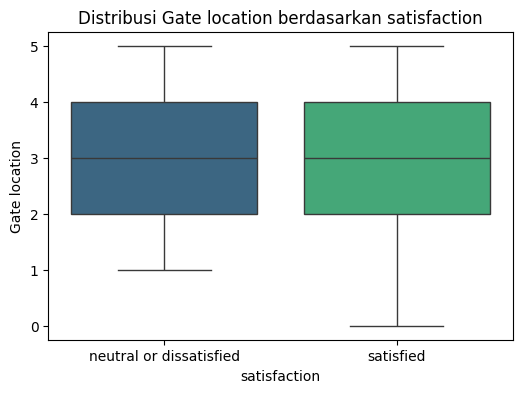

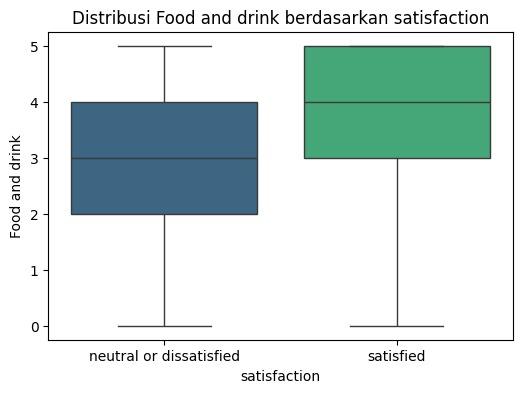

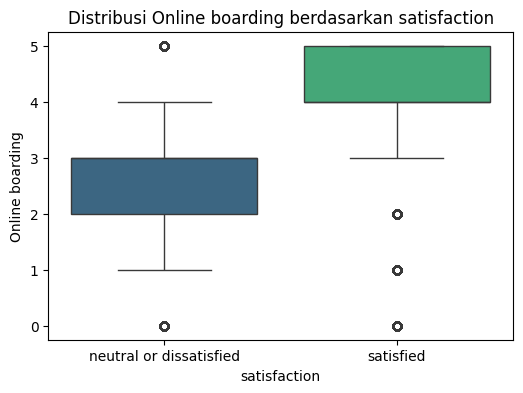

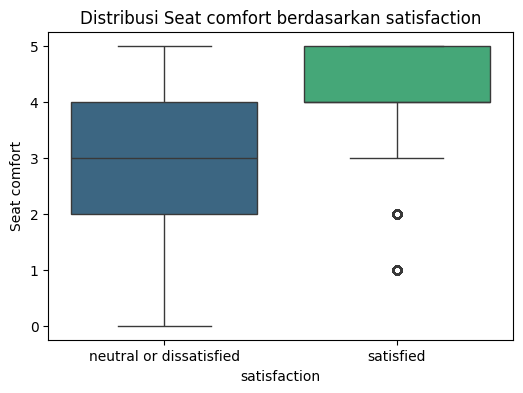

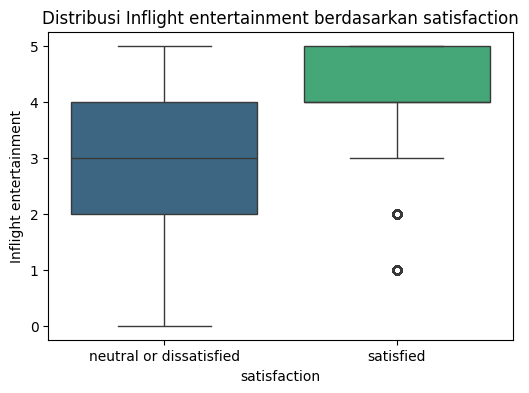

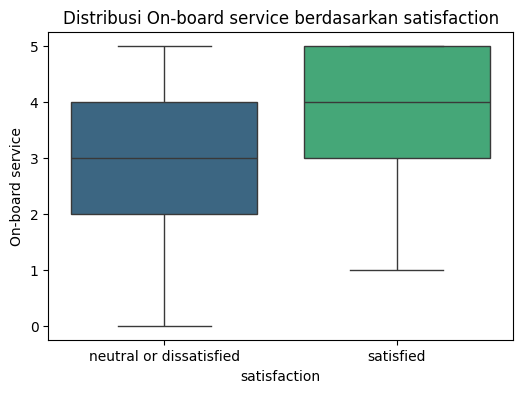

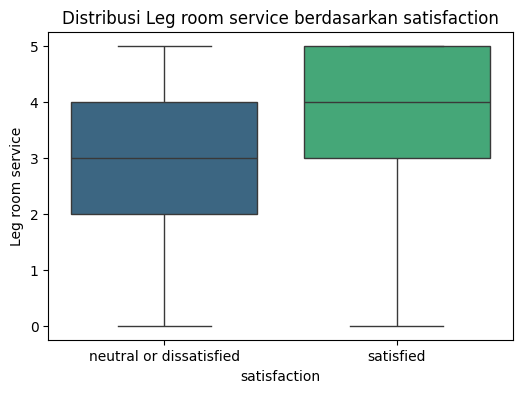

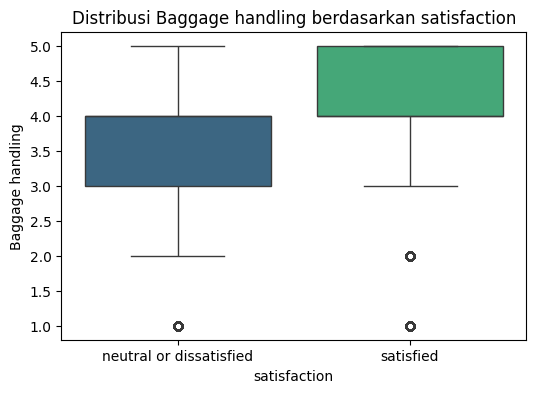

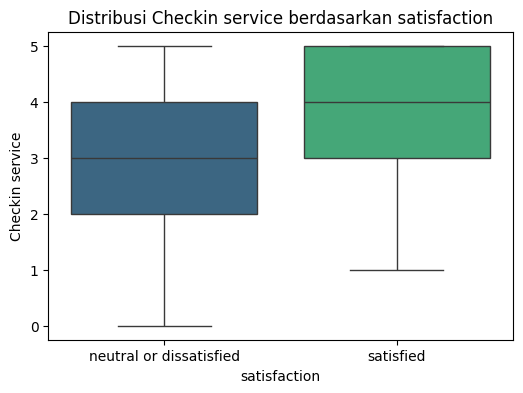

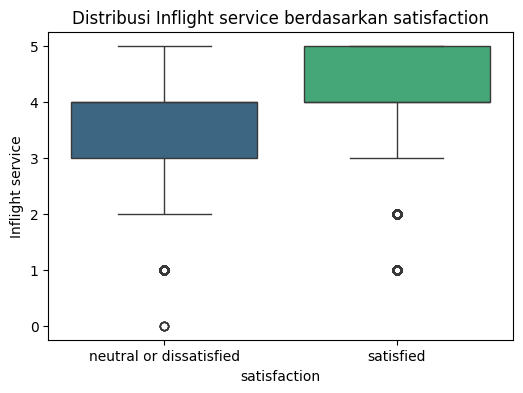

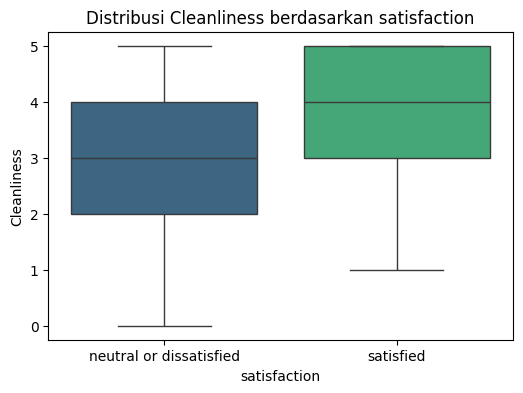

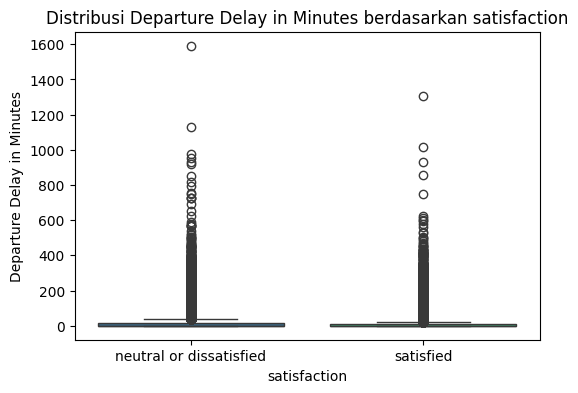

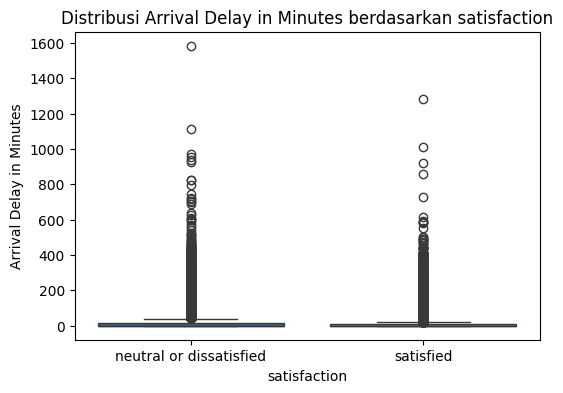

In [19]:
# Target variable
target = 'satisfaction'

# --- Analisis Bivariat untuk fitur kategorikal ---
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()
categorical_cols.remove(target)  # hapus target dari list

print("=== Analisis Bivariat: Fitur Kategorikal ===")
for col in categorical_cols:
    print(f"\nKolom: {col}")
    # Proporsi per kategori target
    prop = pd.crosstab(df[col], df[target], normalize='index') * 100
    display(prop.round(2))

    # Visualisasi countplot terpisah per target
    plt.figure(figsize=(6,4))
    sns.countplot(data=df, x=col, hue=target, palette="viridis")
    plt.title(f'Distribusi {col} berdasarkan {target}')
    plt.xticks(rotation=45)
    plt.legend(title=target)
    plt.show()

# --- Analisis Bivariat untuk fitur numerikal ---
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
numerical_cols = [col for col in numerical_cols if col not in ['Unnamed: 0', 'id']]  # drop kolom id/index

print("\n=== Analisis Bivariat: Fitur Numerikal ===")
for col in numerical_cols:
    plt.figure(figsize=(6,4))
    sns.boxplot(data=df, x=target, y=col, palette="viridis")
    plt.title(f'Distribusi {col} berdasarkan {target}')
    plt.show()

**Kesimpulan Analisis Bivariat terhadap Target**

- **Fitur Kategorikal**  
  - `Customer Type` memiliki perbedaan paling mencolok: *loyal customer* cenderung puas (47,81%), sementara *disloyal customer* mayoritas tidak puas (76,03%).  
  - `Type of Travel` menunjukkan pola jelas: perjalanan bisnis lebih banyak puas (58,37%), sedangkan perjalanan pribadi sangat dominan tidak puas (89,87%).  
  - `Class` juga signifikan: kelas *Business* sangat didominasi penumpang puas (69,44%), sedangkan *Economy* dan *Eco Plus* lebih banyak tidak puas.  
  - `Gender` memiliki distribusi yang hampir seimbang, sehingga kemungkinan bukan faktor utama kepuasan.

- **Fitur Numerikal/Ordinal (Skala Layanan)**  
  - Fitur layanan seperti `Online boarding`, `Seat comfort`, `Inflight entertainment`, dan `Baggage handling` menunjukkan perbedaan jelas antara penumpang puas dan tidak puas, terutama pada nilai skala yang tinggi (4–5) yang lebih sering dimiliki kelompok puas.  
  - `Flight Distance` memperlihatkan bahwa penerbangan >2000 mil yang masuk kategori tidak puas cukup banyak, sehingga jarak jauh bukan jaminan kepuasan. Ini bisa mengindikasikan masalah layanan khusus pada penerbangan jarak jauh.  
  - `Departure/Arrival Delay` didominasi outlier keterlambatan ekstrem. Secara bisnis, outlier ini penting karena keterlambatan panjang meskipun jarang dapat berdampak besar pada persepsi kualitas layanan. Namun, untuk modeling, outlier ekstrem dapat merusak distribusi dan sebaiknya diuji dampaknya sebelum diputuskan untuk di-handle atau tidak.

**Implikasi Bisnis**  
- Peningkatan layanan di kelas ekonomi dan segmen perjalanan pribadi menjadi prioritas, karena kedua kelompok ini mendominasi ketidakpuasan.  
- Fokus pada layanan yang memiliki perbedaan mencolok antar kelompok puas vs tidak puas (misalnya *Online boarding*, *Seat comfort*, *Inflight entertainment*) berpotensi memberi dampak signifikan terhadap kepuasan.  
- Evaluasi layanan pada penerbangan jarak jauh penting, mengingat tingginya ketidakpuasan pada segmen ini.  
- Meskipun keterlambatan ekstrem jarang, dampaknya besar pada reputasi, sehingga perlu strategi mitigasi yang jelas.

## 4.4 Missing Values

Pada tahap ini, kita akan:
1. Mengidentifikasi kolom yang memiliki nilai hilang (*missing values*).
2. Mengukur proporsi nilai hilang pada setiap kolom.
3. Memvisualisasikan pola kemunculan nilai hilang untuk mendeteksi apakah terdapat hubungan antar kolom dalam hal *missingness*.
4. Menentukan apakah nilai hilang tersebut bersifat acak (*Missing Completely at Random* / MCAR), bergantung pada variabel lain (*Missing at Random* / MAR), atau tidak acak (*Missing Not at Random* / MNAR), sebagai dasar penanganan selanjutnya.

===== Missing Values Summary =====
                                   Missing Values  Percentage (%)
Arrival Delay in Minutes                      393        0.302587
Unnamed: 0                                      0        0.000000
Online boarding                                 0        0.000000
Departure Delay in Minutes                      0        0.000000
Cleanliness                                     0        0.000000
Inflight service                                0        0.000000
Checkin service                                 0        0.000000
Baggage handling                                0        0.000000
Leg room service                                0        0.000000
On-board service                                0        0.000000
Inflight entertainment                          0        0.000000
Seat comfort                                    0        0.000000
Food and drink                                  0        0.000000
id                                       

<Axes: >

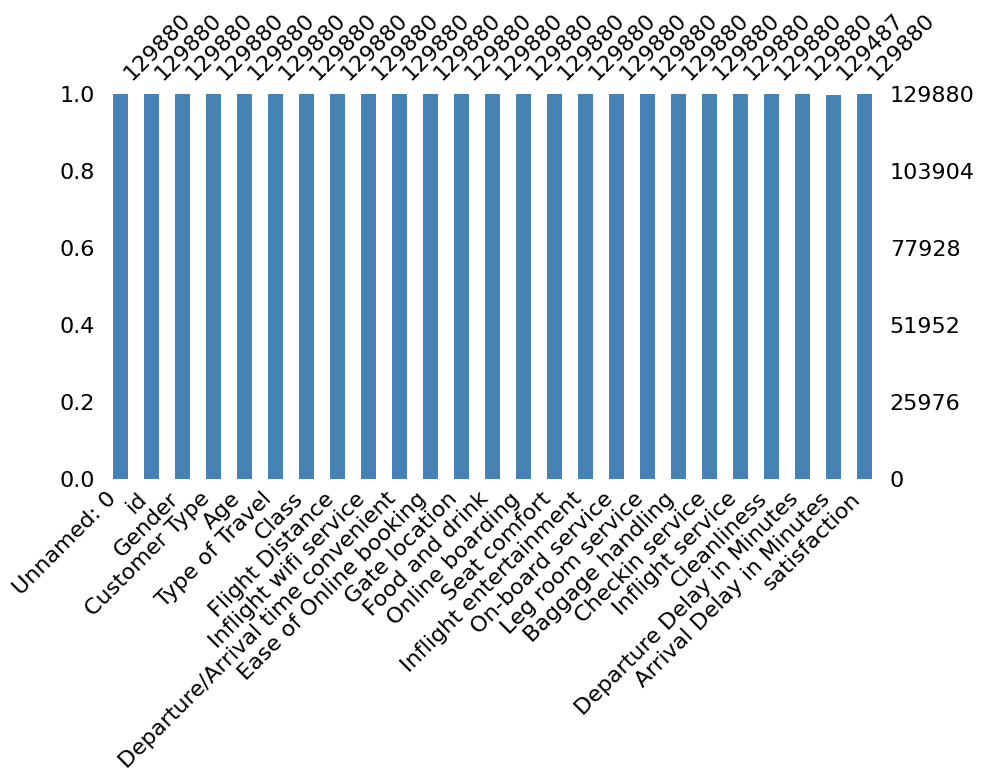

In [20]:
# Import library tambahan untuk visualisasi missing values
import missingno as msno

# 1. Hitung jumlah dan persentase missing values
missing_count = df.isnull().sum()
missing_percent = (missing_count / len(df)) * 100
missing_df = pd.DataFrame({
    'Missing Values': missing_count,
    'Percentage (%)': missing_percent
}).sort_values(by='Missing Values', ascending=False)

print("===== Missing Values Summary =====")
print(missing_df)

# 2. Visualisasi distribusi missing values per kolom
msno.bar(df, color='steelblue', figsize=(10,5))

### Kesimpulan Pemeriksaan Missing Values

- Hanya terdapat **1 kolom dengan missing values**, yaitu **`Arrival Delay in Minutes`** sebanyak **393 baris** atau **0,30% dari total data**.  
- Berdasarkan konteks bisnis penerbangan, *missing values* ini kemungkinan muncul **karena penerbangan tiba tepat waktu** (tidak mengalami keterlambatan kedatangan).  
- Dalam praktik pencatatan data, kondisi tanpa delay sering kali dibiarkan kosong karena dianggap tidak perlu mencatat angka "0".  
- Dengan demikian, *missing values* ini termasuk kategori **MNAR (Missing Not At Random)**, di mana ketiadaan data berkaitan langsung dengan nilai yang sebenarnya (dalam hal ini "tidak ada delay").  
- **Rekomendasi penanganan**: Mengisi nilai *missing* ini dengan **0 menit** untuk mencerminkan tidak adanya keterlambatan, sehingga interpretasi data tetap akurat dan tidak menimbulkan bias.

## 4.5 Analisis Distribusi dan Deteksi Outlier

Tahap ini bertujuan untuk:
1. Mengidentifikasi distribusi variabel numerik guna memahami karakteristik data (apakah normal, skewed, atau memiliki distribusi khusus).
2. Mendeteksi keberadaan *outlier* yang berpotensi memengaruhi hasil analisis dan kinerja model.
3. Memberikan pertimbangan apakah *outlier* perlu diatasi atau dibiarkan, dengan melihat konteks bisnis penerbangan.

Langkah-langkah yang akan dilakukan:
- Visualisasi distribusi untuk setiap variabel numerik menggunakan histogram dan boxplot.
- Menggunakan metode **Interquartile Range (IQR)** untuk mendeteksi *outlier*.
- Membandingkan *outlier* yang terdeteks

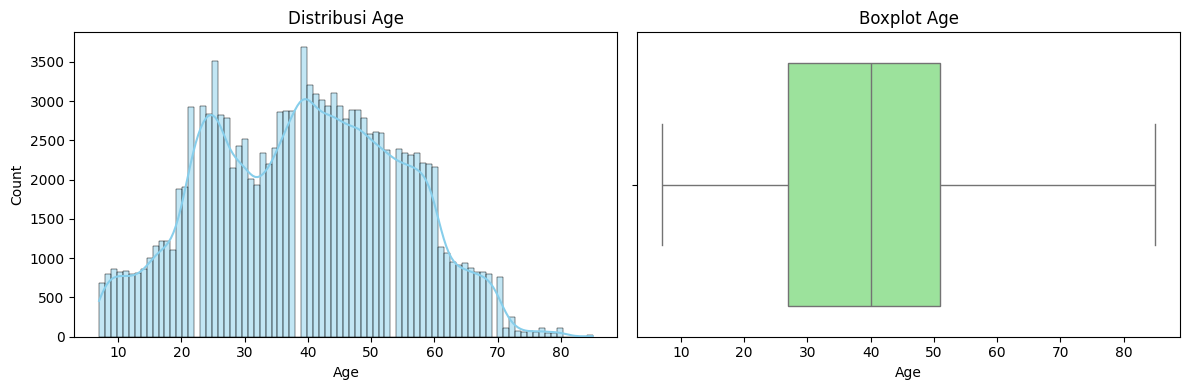

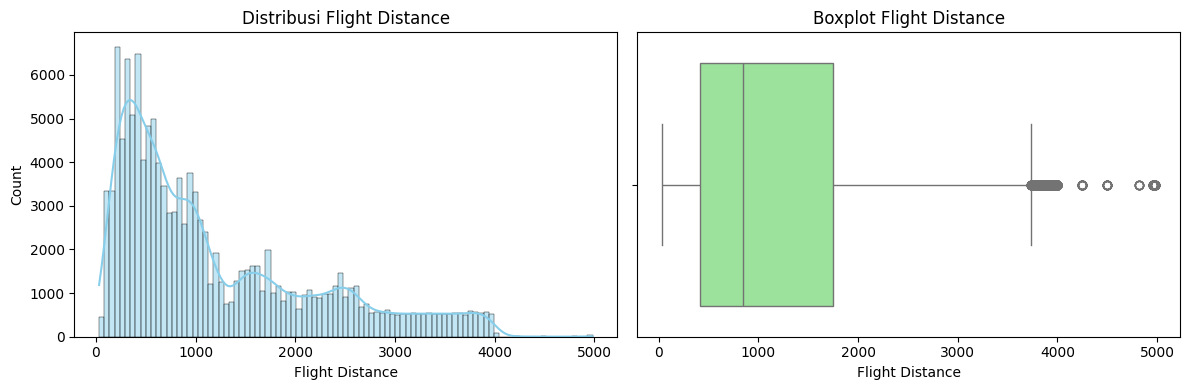

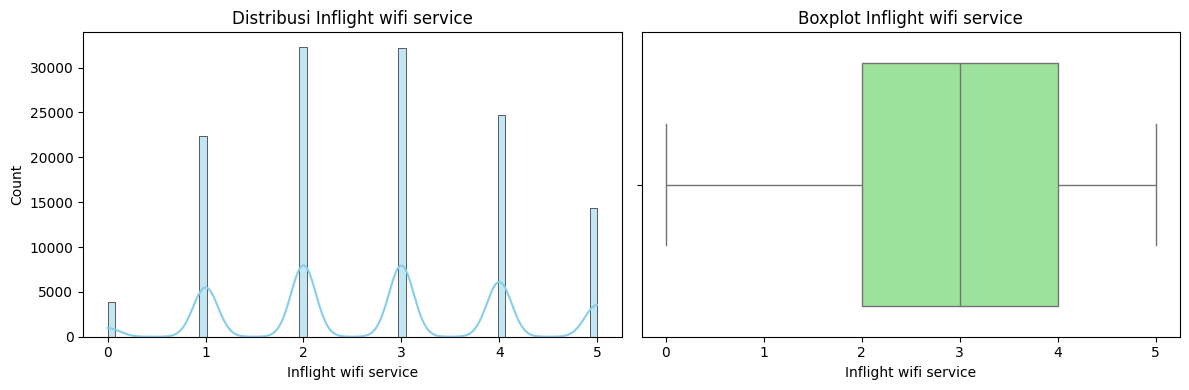

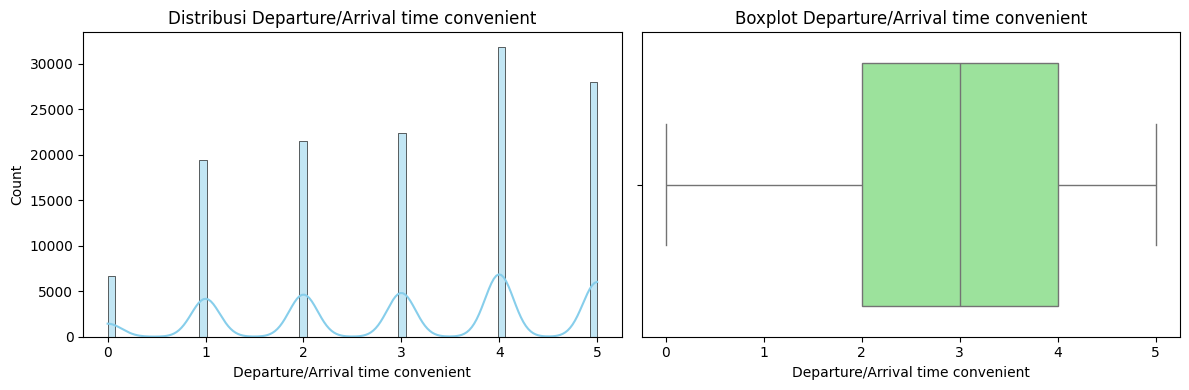

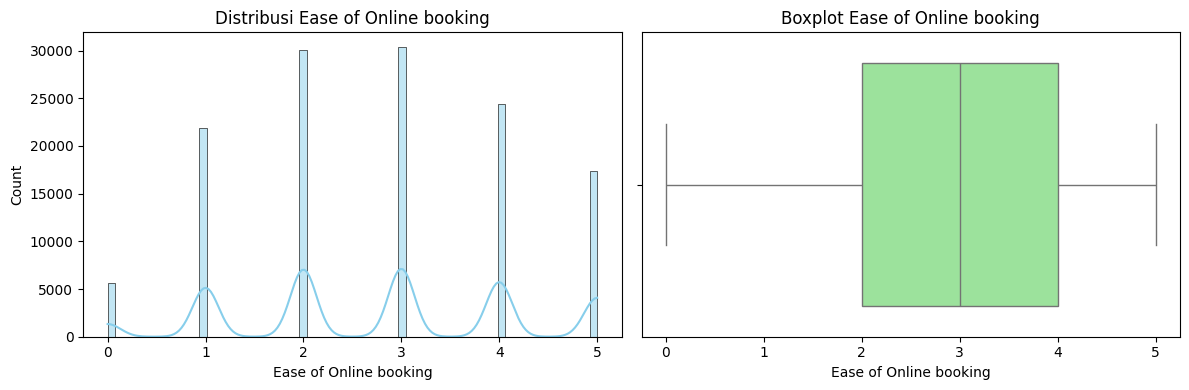

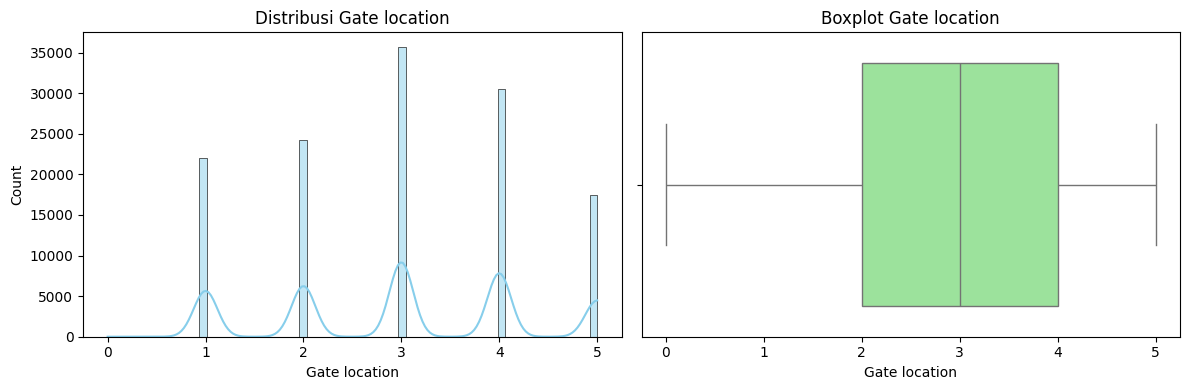

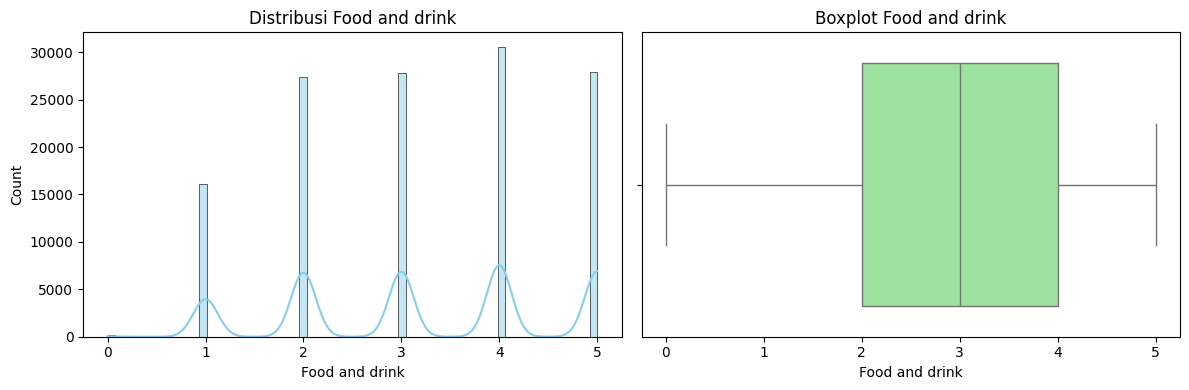

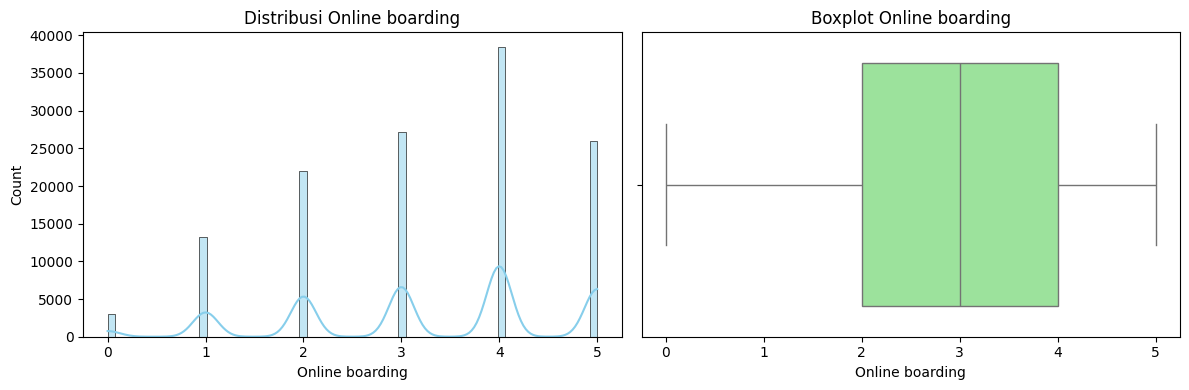

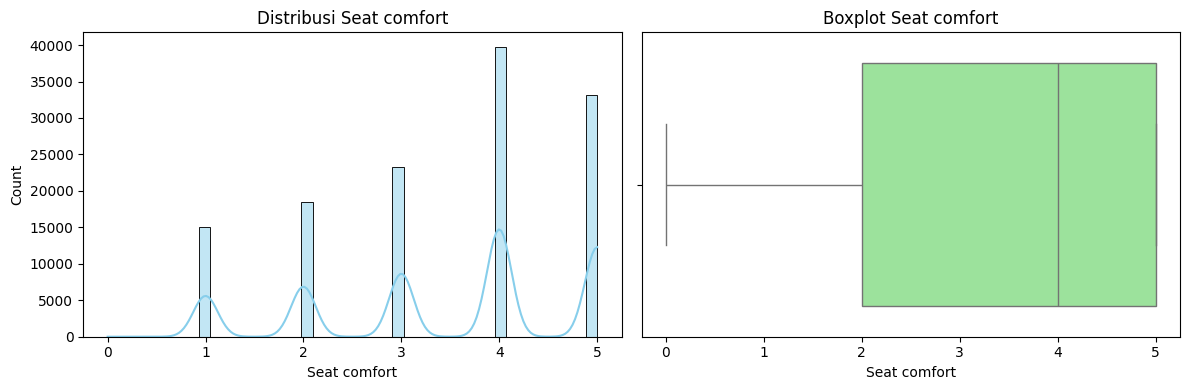

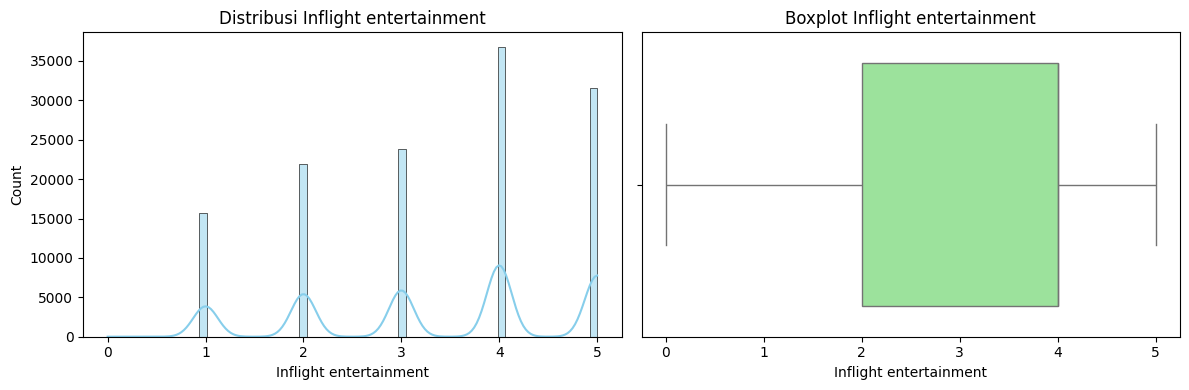

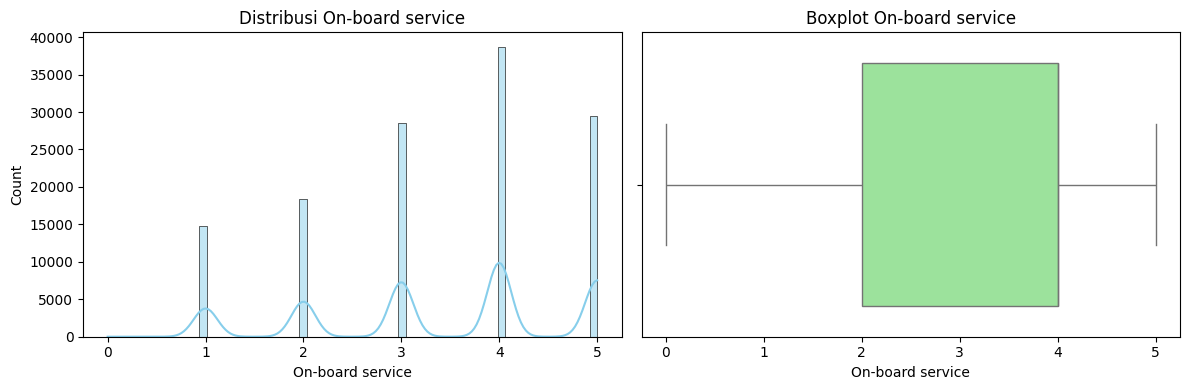

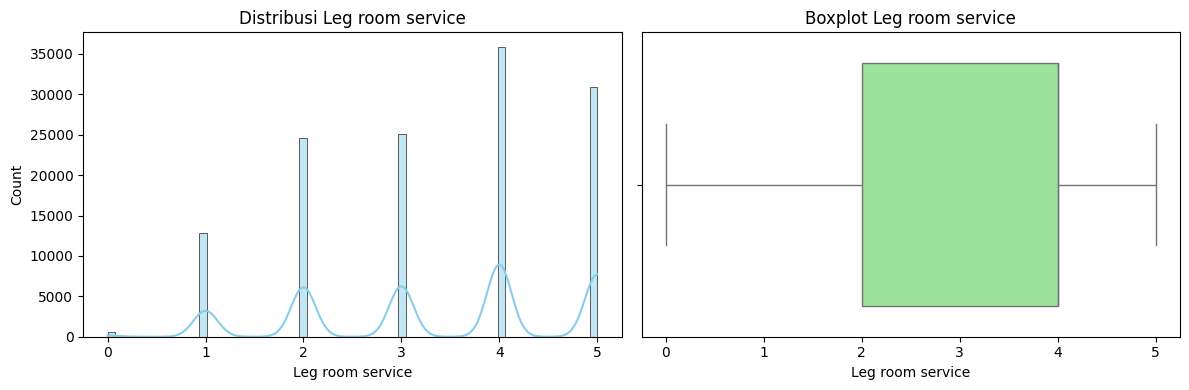

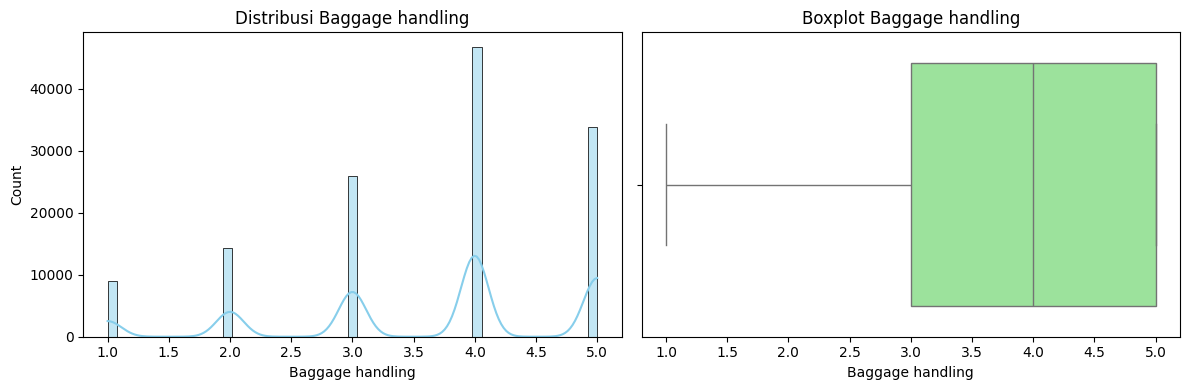

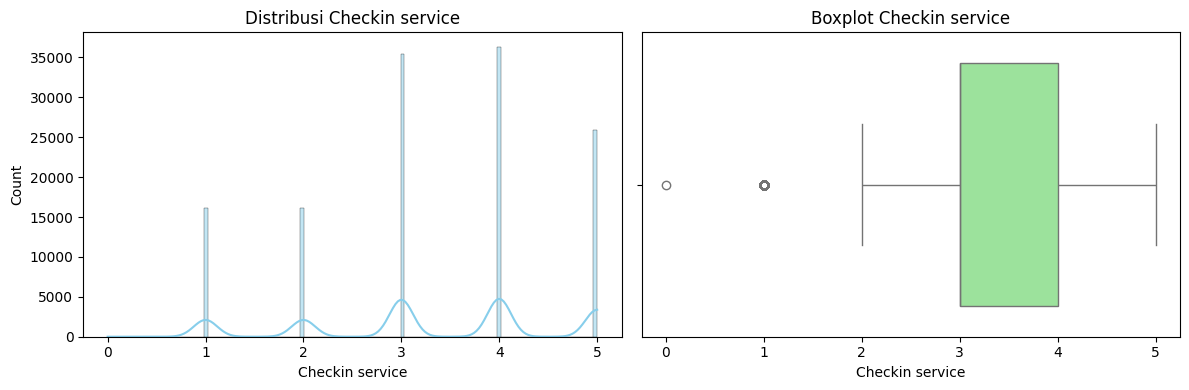

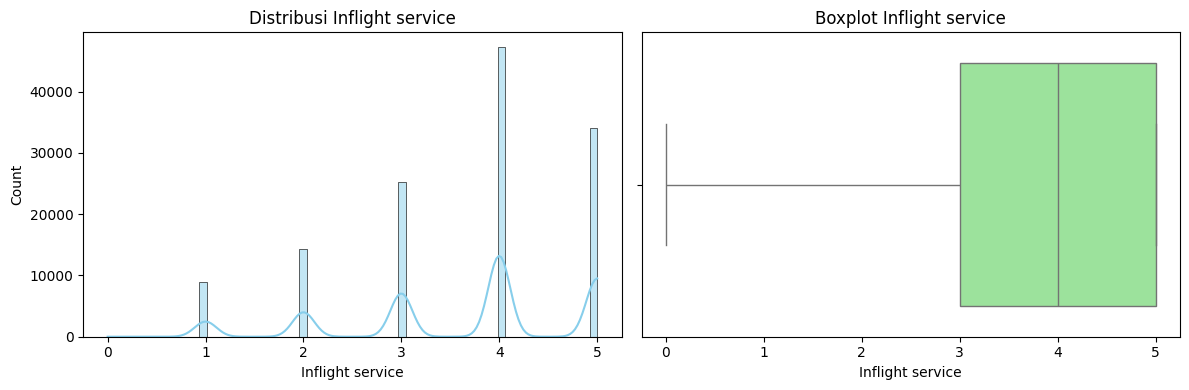

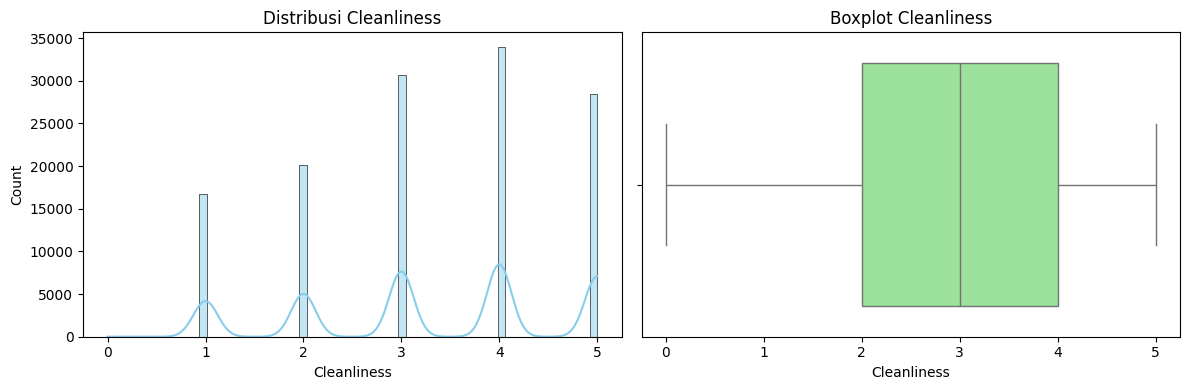

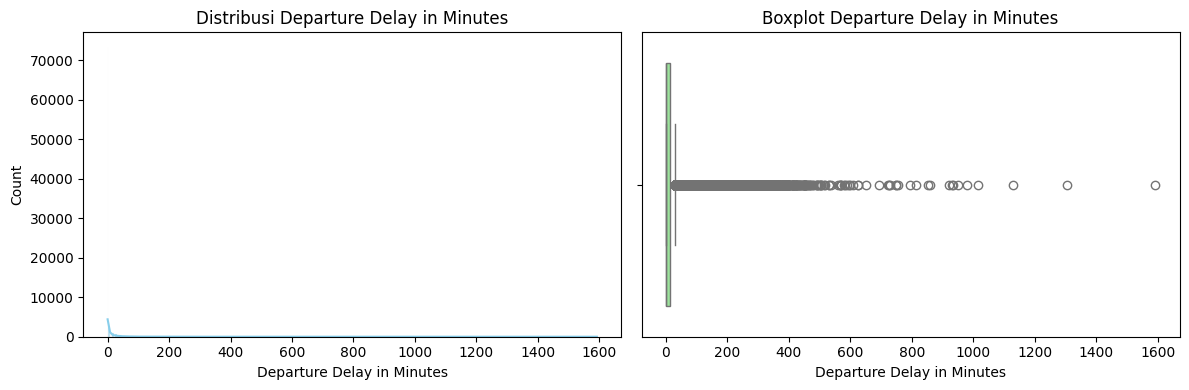

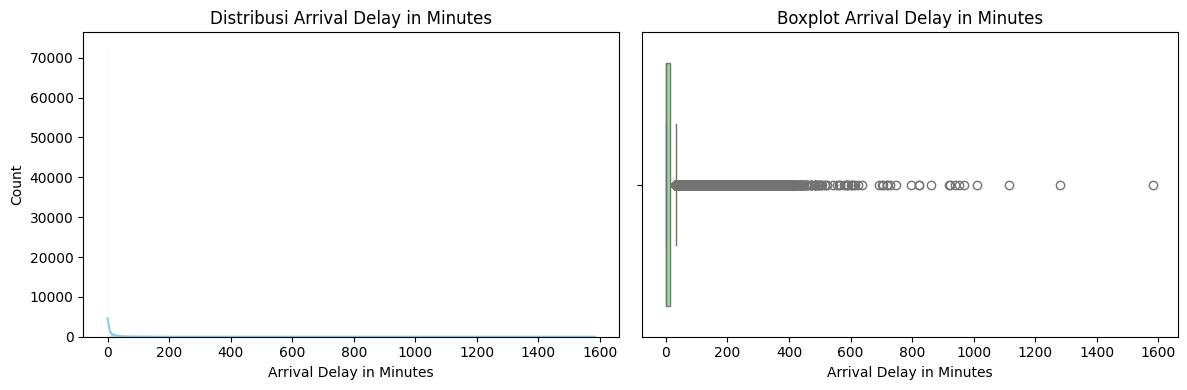

,Jumlah Outlier,Persentase (%)
Age,0.0,0.00
Flight Distance,2855.0,2.20
Inflight wifi service,0.0,0.00
Departure/Arrival time convenient,0.0,0.00
Ease of Online booking,0.0,0.00
Gate location,0.0,0.00
Food and drink,0.0,0.00
Online boarding,0.0,0.00
Seat comfort,0.0,0.00
Inflight entertainment,0.0,0.00


In [21]:
# iv. Analisis Distribusi dan Deteksi Outlier
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Daftar kolom numerik (kecuali ID dan index)
num_cols = df.select_dtypes(include=[np.number]).columns.tolist()
num_cols = [col for col in num_cols if col not in ['Unnamed: 0', 'id']]

# Visualisasi distribusi dan boxplot
for col in num_cols:
    fig, axes = plt.subplots(1, 2, figsize=(12, 4))
    
    # Histogram
    sns.histplot(df[col], kde=True, ax=axes[0], color='skyblue')
    axes[0].set_title(f'Distribusi {col}')
    
    # Boxplot
    sns.boxplot(x=df[col], ax=axes[1], color='lightgreen')
    axes[1].set_title(f'Boxplot {col}')
    
    plt.tight_layout()
    plt.show()

# Deteksi outlier dengan metode IQR
outlier_summary = {}
for col in num_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)][col]
    outlier_summary[col] = {
        'Jumlah Outlier': len(outliers),
        'Persentase (%)': round(len(outliers) / len(df) * 100, 2)
    }

# Hasil ringkasan outlier
outlier_df = pd.DataFrame(outlier_summary).T
outlier_df

In [22]:
# iv. Analisis Distribusi dan Deteksi Outlier
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Daftar kolom numerik (kecuali ID dan index)
num_cols = df.select_dtypes(include=[np.number]).columns.tolist()
num_cols = [col for col in num_cols if col not in ['Unnamed: 0', 'id']]

# Deteksi outlier dengan metode IQR
outlier_summary = {}
for col in num_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)][col]
    outlier_summary[col] = {
        'Jumlah Outlier': len(outliers),
        'Persentase (%)': round(len(outliers) / len(df) * 100, 2)
    }

# Cetak hasil outlier dalam format teks
print("===== Ringkasan Outlier (Metode IQR) =====")
for col, stats in outlier_summary.items():
    print(f"{col}: Jumlah Outlier = {stats['Jumlah Outlier']}, Persentase = {stats['Persentase (%)']}%")


===== Ringkasan Outlier (Metode IQR) =====
Age: Jumlah Outlier = 0, Persentase = 0.0%
Flight Distance: Jumlah Outlier = 2855, Persentase = 2.2%
Inflight wifi service: Jumlah Outlier = 0, Persentase = 0.0%
Departure/Arrival time convenient: Jumlah Outlier = 0, Persentase = 0.0%
Ease of Online booking: Jumlah Outlier = 0, Persentase = 0.0%
Gate location: Jumlah Outlier = 0, Persentase = 0.0%
Food and drink: Jumlah Outlier = 0, Persentase = 0.0%
Online boarding: Jumlah Outlier = 0, Persentase = 0.0%
Seat comfort: Jumlah Outlier = 0, Persentase = 0.0%
Inflight entertainment: Jumlah Outlier = 0, Persentase = 0.0%
On-board service: Jumlah Outlier = 0, Persentase = 0.0%
Leg room service: Jumlah Outlier = 0, Persentase = 0.0%
Baggage handling: Jumlah Outlier = 0, Persentase = 0.0%
Checkin service: Jumlah Outlier = 16109, Persentase = 12.4%
Inflight service: Jumlah Outlier = 0, Persentase = 0.0%
Cleanliness: Jumlah Outlier = 0, Persentase = 0.0%
Departure Delay in Minutes: Jumlah Outlier = 1809

### Kesimpulan Analisis Outlier (Metode IQR)

Berdasarkan hasil deteksi *outlier* menggunakan metode IQR:

1. **Mayoritas Fitur Tidak Mengandung Outlier**  
   Sebagian besar variabel, termasuk fitur pelayanan seperti *Seat comfort*, *Online boarding*, *Food and drink*, dan lainnya, tidak menunjukkan adanya *outlier*. Hal ini mengindikasikan distribusi nilai yang relatif stabil pada aspek penilaian layanan penumpang.

2. **Fitur dengan Outlier Rendah (Persentase < 5%)**  
   - *Flight Distance*: 2,20% data terdeteksi sebagai *outlier*. Kemungkinan ini mencerminkan penerbangan jarak sangat jauh (*long-haul flights*) yang jarang terjadi, namun masih relevan secara bisnis sehingga tidak harus dihapus.

3. **Fitur dengan Outlier Sedang (5%–15%)**  
   - *Checkin service*: 12,40% *outlier*. Dapat menunjukkan kasus ekstrem baik sangat puas (nilai maksimum) atau sangat tidak puas (nilai minimum) terhadap layanan check-in.  
   - *Departure Delay in Minutes*: 13,93% *outlier*.  
   - *Arrival Delay in Minutes*: 13,47% *outlier*.  
     Kedua variabel delay ini memang secara alamiah memiliki distribusi yang sangat *skewed*, dengan sedikit penerbangan mengalami keterlambatan ekstrim (ratusan menit). Dalam konteks bisnis maskapai, *outlier* ini justru penting untuk dianalisis karena dapat memengaruhi tingkat kepuasan secara signifikan.

4. **Implikasi terhadap Pemodelan dan Bisnis**  
   - *Outlier* pada variabel delay sebaiknya **tidak langsung dihapus**, karena mewakili kejadian penting (misalnya gangguan operasional, cuaca ekstrem, atau masalah teknis) yang berdampak besar pada persepsi penumpang.  
   - *Outlier* pada *Flight Distance* kemungkinan merupakan rute internasional jarak jauh yang bisa menjadi segmen pasar tersendiri, sehingga juga layak dipertahankan.
   - Pembersihan *outlier* mungkin lebih relevan untuk variabel seperti *Checkin service* jika terbukti ada kesalahan pencatatan (misalnya input nilai tidak masuk akal).

Secara keseluruhan, sebagian besar *outlier* di dataset ini memiliki relevansi bisnis, sehingga perlakuan terhadapnya harus mempertimbangkan konteks operasional maskapai, bukan sekadar kriteria statistik.

---

# 5. Feature Engineering

Pada tahap ini, kita akan mempersiapkan dataset agar dapat digunakan dalam proses pelatihan model machine learning.  
Beberapa proses yang akan dilakukan antara lain:

1. **Train-Test Split**  
   Dataset yang sudah digabung dari `train.csv` dan `test.csv` akan dibagi kembali menjadi *train set* dan *test set* secara acak. Hal ini bertujuan untuk menghindari *data leakage* sekaligus memastikan evaluasi model dilakukan pada data yang belum pernah dilihat oleh model sebelumnya.

2. **Handling Missing Values**  
   Mengecek dan menangani data yang hilang (*missing values*) baik pada fitur numerik maupun kategorikal.

3. **Encoding**  
   Mengubah fitur kategorikal menjadi bentuk numerik menggunakan teknik *encoding* yang sesuai (misalnya *One-Hot Encoding* atau *Ordinal Encoding*), agar dapat diproses oleh algoritma machine learning.

4. **Feature Scaling**  
   Melakukan normalisasi atau standardisasi pada fitur numerik agar semua fitur berada dalam skala yang sebanding, khususnya untuk algoritma yang sensitif terhadap skala data seperti KNN dan SVM.

5. **Pipeline**  
   Seluruh proses transformasi akan dirangkai ke dalam sebuah *pipeline* Scikit-Learn. Hal ini bertujuan untuk memastikan proses *preprocessing* berjalan konsisten saat pelatihan maupun saat inferensi di luar notebook utama.

Tahapan ini sangat penting untuk memastikan data yang digunakan optimal bagi algoritma, sekaligus menjaga reprodusibilitas model.

## 5.1 Train-Test Split

In [23]:
# Import library
import pandas as pd
from sklearn.model_selection import train_test_split

# Asumsi df adalah dataframe hasil gabungan train.csv dan test.csv
# Cek shape awal
print("Shape awal dataset:", df.shape)

# Pisahkan fitur (X) dan target (y)
X = df.drop(columns=["satisfaction"])
y = df["satisfaction"]

# Train-Test Split (80:20)
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

print("Shape X_train:", X_train.shape)
print("Shape X_test:", X_test.shape)
print("Distribusi target pada y_train:")
print(y_train.value_counts(normalize=True))
print("\nDistribusi target pada y_test:")
print(y_test.value_counts(normalize=True))

Shape awal dataset: (129880, 25)
Shape X_train: (103904, 24)
Shape X_test: (25976, 24)
Distribusi target pada y_train:
satisfaction
neutral or dissatisfied    0.565541
satisfied                  0.434459
Name: proportion, dtype: float64

Distribusi target pada y_test:
satisfaction
neutral or dissatisfied    0.565522
satisfied                  0.434478
Name: proportion, dtype: float64


Dataset awal terdiri dari **129.880 baris** dan **25 kolom**, termasuk kolom target `satisfaction`.  
Setelah memisahkan fitur dan target, dilakukan pembagian data menjadi *train set* (**80%**) dan *test set* (**20%**) menggunakan *stratified sampling* untuk menjaga proporsi kelas tetap seimbang.

Distribusi target pada *train set*:
- **Neutral or dissatisfied**: 56,55%
- **Satisfied**: 43,45%

Distribusi target pada *test set*:
- **Neutral or dissatisfied**: 56,55%
- **Satisfied**: 43,45%

Hasil ini menunjukkan bahwa proporsi kelas pada *train set* dan *test set* konsisten, sehingga model nantinya tidak akan bias terhadap salah satu kelas hanya karena ketidakseimbangan proporsi data.

## 5.2 Missing Values

### 5.2.1 Missing Values Null/NaN

Berdasarkan hasil EDA sebelumnya, *missing values* pada dataset ini bersifat **MNAR (Missing Not At Random)**, khususnya pada kolom yang berhubungan dengan keterlambatan penerbangan (*delay*).  
Pola yang ditemukan menunjukkan bahwa jika tidak terjadi delay, penumpang cenderung tidak mengisi kolom terkait.  
Oleh karena itu, strategi penanganan dilakukan sebagai berikut:

- **Kolom numerik** `Departure Delay in Minutes` dan `Arrival Delay in Minutes` diisi dengan `0` menit (artinya tidak ada delay).
- Kolom lainnya tidak memiliki *missing values*, sehingga tidak memerlukan imputasi tambahan.

Pendekatan ini mempertahankan makna asli dari data, sehingga kondisi *no delay* tetap terwakili secara akurat.

In [24]:
# Isi missing value di kolom delay dengan 0
X_train_filled = X_train.copy()
X_test_filled = X_test.copy()

for col in ["Departure Delay in Minutes", "Arrival Delay in Minutes"]:
    X_train_filled[col] = X_train_filled[col].fillna(0)
    X_test_filled[col] = X_test_filled[col].fillna(0)

# Cek apakah masih ada missing values
print("Total missing values di X_train:", X_train_filled.isnull().sum().sum())
print("Total missing values di X_test:", X_test_filled.isnull().sum().sum())

Total missing values di X_train: 0
Total missing values di X_test: 0


Missing value pada kolom `Departure Delay in Minutes` telah diisi dengan value '**0**' (minutes).

### 5.2.2 Handling Encoded Missing Values (Value = 0)

Pada beberapa kolom survei kepuasan penumpang yang berskala ordinal (1–5), ditemukan adanya nilai `0`. Nilai ini tidak termasuk dalam skala yang valid dan kemungkinan merupakan bentuk *missing values* yang telah ter-*encode*. Oleh karena itu, nilai `0` akan diganti dengan **modus** dari kolom tersebut (berdasarkan data *train set*) agar distribusi tetap merepresentasikan mayoritas pengalaman penumpang.

In [25]:
# Daftar kolom ordinal survei satisfaction
ordinal_survey_cols = [
    "Inflight wifi service",
    "Departure/Arrival time convenient",
    "Ease of Online booking",
    "Gate location",
    "Food and drink",
    "Online boarding",
    "Seat comfort",
    "Inflight entertainment",
    "On-board service",
    "Leg room service",
    "Baggage handling",
    "Checkin service",
    "Inflight service",
    "Cleanliness"
]

# Ganti 0 dengan modus (berdasarkan train set)
for col in ordinal_survey_cols:
    mode_val = X_train_filled.loc[X_train_filled[col] != 0, col].mode()[0]
    X_train_filled[col] = X_train_filled[col].replace(0, mode_val)
    X_test_filled[col] = X_test_filled[col].replace(0, mode_val)

# Cek hasil
for col in ordinal_survey_cols:
    print(f"{col} -> unique values: {sorted(X_train_filled[col].unique())}")

Inflight wifi service -> unique values: [1, 2, 3, 4, 5]
Departure/Arrival time convenient -> unique values: [1, 2, 3, 4, 5]
Ease of Online booking -> unique values: [1, 2, 3, 4, 5]
Gate location -> unique values: [1, 2, 3, 4, 5]
Food and drink -> unique values: [1, 2, 3, 4, 5]
Online boarding -> unique values: [1, 2, 3, 4, 5]
Seat comfort -> unique values: [1, 2, 3, 4, 5]
Inflight entertainment -> unique values: [1, 2, 3, 4, 5]
On-board service -> unique values: [1, 2, 3, 4, 5]
Leg room service -> unique values: [1, 2, 3, 4, 5]
Baggage handling -> unique values: [1, 2, 3, 4, 5]
Checkin service -> unique values: [1, 2, 3, 4, 5]
Inflight service -> unique values: [1, 2, 3, 4, 5]
Cleanliness -> unique values: [1, 2, 3, 4, 5]


## 5.3 Encoding

Tahap ini bertujuan mengubah fitur kategorikal menjadi bentuk numerik agar dapat diproses oleh algoritma *machine learning*. Pada dataset ini, terdapat dua jenis kolom kategorikal:

1. **Nominal** – Tidak memiliki urutan tertentu, seperti `Gender`, `Customer Type`, `Type of Travel`, dan `Class`.  
   → Diubah menjadi numerik menggunakan *One-Hot Encoding*.

2. **Ordinal** – Memiliki urutan atau tingkatan, seperti kolom survei kepuasan (skala 1–5).  
   → Karena sudah berbentuk numerik, tidak perlu di-encode ulang.

Metode ini memastikan bahwa algoritma tidak salah menginterpretasikan hubungan antar kategori, sekaligus mempertahankan informasi urutan pada variabel ordinal.

In [26]:
# Import library
import pandas as pd
from sklearn.preprocessing import OneHotEncoder

# Salin data
X_train_encoded = X_train_filled.copy()
X_test_encoded = X_test_filled.copy()

# Identifikasi kolom nominal
nominal_cols = ["Gender", "Customer Type", "Type of Travel", "Class"]

# One-Hot Encoding untuk kolom nominal
ohe = OneHotEncoder(drop="first", sparse_output=False, handle_unknown="ignore")

# Fit di train dan transform di train & test
ohe_train = pd.DataFrame(
    ohe.fit_transform(X_train_encoded[nominal_cols]),
    columns=ohe.get_feature_names_out(nominal_cols),
    index=X_train_encoded.index
)
ohe_test = pd.DataFrame(
    ohe.transform(X_test_encoded[nominal_cols]),
    columns=ohe.get_feature_names_out(nominal_cols),
    index=X_test_encoded.index
)

# Gabungkan hasil OHE dengan data yang sudah dibuang kolom nominal aslinya
X_train_encoded = pd.concat([X_train_encoded.drop(columns=nominal_cols), ohe_train], axis=1)
X_test_encoded = pd.concat([X_test_encoded.drop(columns=nominal_cols), ohe_test], axis=1)

print("Shape X_train_encoded:", X_train_encoded.shape)
print("Shape X_test_encoded:", X_test_encoded.shape)

Shape X_train_encoded: (103904, 25)
Shape X_test_encoded: (25976, 25)


Proses *encoding* dilakukan untuk mengubah variabel kategorikal nominal menjadi bentuk numerik agar dapat diproses oleh algoritma *machine learning*.  
Empat kolom nominal yang di-*encode* adalah:

- `Gender`
- `Customer Type`
- `Type of Travel`
- `Class`

Metode yang digunakan adalah **One-Hot Encoding** dengan opsi `drop="first"` untuk menghindari multikolinearitas, serta `handle_unknown="ignore"` untuk mengantisipasi kategori baru pada data uji atau saat inferensi.  

Setelah proses ini:
- Jumlah fitur bertambah sesuai dengan banyaknya kategori baru yang dihasilkan dari One-Hot Encoding.
- Kolom ordinal (skala 1–5) seperti survei kepuasan tetap dibiarkan dalam bentuk numerik karena sudah merepresentasikan urutan.

Hasil akhir memastikan bahwa seluruh variabel kategorikal kini dalam bentuk numerik, siap digunakan untuk pelatihan model.

## 5.4 Feature Scaling

Tahap ini bertujuan untuk menyamakan skala seluruh fitur numerik agar model machine learning dapat memprosesnya secara optimal. Algoritma seperti **KNN** dan **SVM** sangat sensitif terhadap perbedaan skala, sehingga tanpa scaling, fitur dengan rentang nilai yang besar dapat mendominasi proses pembelajaran model.

Metode yang digunakan adalah **StandardScaler** dari Scikit-Learn, yang mengubah setiap fitur menjadi memiliki:
- Rata-rata (`mean`) = 0
- Standar deviasi (`std`) = 1

Dengan pendekatan ini, semua fitur berada pada skala yang sebanding tanpa mengubah distribusi relatifnya.

In [27]:
# Import library
from sklearn.preprocessing import StandardScaler

# Inisialisasi scaler
scaler = StandardScaler()

# Fit di train dan transform train & test
X_train_scaled = pd.DataFrame(
    scaler.fit_transform(X_train_encoded),
    columns=X_train_encoded.columns,
    index=X_train_encoded.index
)

X_test_scaled = pd.DataFrame(
    scaler.transform(X_test_encoded),
    columns=X_test_encoded.columns,
    index=X_test_encoded.index
)

print("Mean (train):\n", X_train_scaled.mean().round(4).head())
print("\nStd (train):\n", X_train_scaled.std().round(4).head())

Mean (train):
 Unnamed: 0               0.0
id                       0.0
Age                      0.0
Flight Distance          0.0
Inflight wifi service    0.0
dtype: float64

Std (train):
 Unnamed: 0               1.0
id                       1.0
Age                      1.0
Flight Distance          1.0
Inflight wifi service    1.0
dtype: float64


In [28]:
X_train_scaled.head()


,Unnamed: 0,id,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,...,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,Gender_Male,Customer Type_disloyal Customer,Type of Travel_Personal Travel,Class_Eco,Class_Eco Plus
56347,0.390397,0.420739,-0.555889,-0.744457,1.772887,1.275542,1.661373,1.580812,-0.910519,-0.275057,...,-0.242334,0.304231,-0.980782,-0.386964,-0.314358,1.015324,-0.473315,-0.668076,-0.902096,-0.279823
103345,1.895813,0.810186,0.501516,-1.004025,0.169220,0.540358,0.088524,0.015271,-1.664158,-0.275057,...,1.337107,1.154235,-1.742198,-0.073347,-0.210670,1.015324,-0.473315,1.496836,1.108530,-0.279823
75976,1.019143,-0.577111,1.096306,-0.756483,1.772887,-0.194827,0.088524,0.015271,1.350398,0.521563,...,-0.242334,0.304231,-1.742198,-0.386964,-0.392123,-0.984908,-0.473315,-0.668076,1.108530,-0.279823
121763,-0.842431,0.786516,-0.952416,-0.630207,-0.632614,0.540358,-0.697900,0.015271,1.350398,-1.071677,...,0.547387,1.154235,1.303466,-0.230156,-0.392123,1.015324,2.112757,-0.668076,-0.902096,-0.279823
107028,-1.314415,-0.778792,0.633691,1.276969,-0.632614,-1.665196,0.088524,0.798041,-1.664158,-1.071677,...,-0.242334,-1.395777,-0.980782,-0.151752,-0.392123,-0.984908,-0.473315,1.496836,-0.902096,3.573687


### Kesimpulan Feature Scaling

Proses **StandardScaler** berhasil mengubah seluruh fitur numerik sehingga memiliki:
- Rata-rata (`mean`) ≈ 0
- Standar deviasi (`std`) ≈ 1

Hal ini memastikan bahwa setiap fitur berada pada skala yang sebanding, sehingga:
- Algoritma sensitif skala seperti **KNN** dan **SVM** dapat bekerja optimal.
- Semua model menerima input dengan format yang seragam.
- Tidak ada fitur yang mendominasi proses pelatihan hanya karena perbedaan rentang nilai.

Pendekatan ini dipilih meskipun model berbasis pohon seperti **Decision Tree**, **Random Forest**, dan **Boosting** tidak sensitif terhadap skala, demi menjaga konsistensi preprocessing pada pipeline.

## 5.5 Cardinality Handling – Numerik Kontinu

Pada beberapa fitur numerik kontinu, terdapat rentang nilai yang sangat luas dan beragam. Untuk menjaga kestabilan model dan efisiensi komputasi, kita menerapkan strategi pengelompokan (binning) berdasarkan domain knowledge dan pola distribusi:

**Age**  
Usia akan dibagi ke dalam rentang kategori yang mencerminkan tahapan hidup penumpang, misalnya:  
- 1 -> **1 – 17**: Remaja  
- 2 -> **18 – 35**: Dewasa muda  
- 3 -> **36 – 55**: Dewasa tetap  
- 4 -> **56 – 75**: Lansia  
- 5 -> **>75**: Senior

**Flight Distance** 
Jarak penerbangan dibagi ke dalam kelompok representatif berdasarkan kelas layanan dan kebutuhan operasional:  
- 1 -> **Short-haul**: ≤ 500 mil  
- 2 -> **Medium-haul**: 501–2000 mil  
- 3 -> **Long-haul**: > 2000 mil

**Departure Delay & Arrival Delay**  
Berdasarkan klasifikasi delay yang dijelaskan dalam sebuah tabel di riset terbaru, delay dibagi menjadi beberapa kelas:  
- **1 – No delay** (T ≤ 15 menit)  
- **2 – Minor delay** (15 < T ≤ 60 menit)  
- **3 – Moderate delay** (60 < T ≤ 120 menit)  
- **4 – High delay** (120 < T ≤ 240 menit)  
- **5 – Significant delay** (T > 240 menit)  
Sumber klasifikasi ini diambil dari riset ilmiah [Classification of flight delays (No delay, Minor, Moderate, High, Significant)](https://www.researchgate.net/figure/Classification-of-flight-delays_tbl1_367205996).

Pendekatan ini tidak hanya mengurangi cardinality tinggi menjadi kategori bermakna, tetapi juga menjaga interpretabilitas dari perspektif bisnis, dan memudahkan dalam analisis segmentasi penumpang serta kebijakan airline terkait delay.

In [29]:
# Salin data agar aman
X_train_binned = X_train_scaled.copy()
X_test_binned = X_test_scaled.copy()

# -----------------------------
# a. Age binning
# -----------------------------
age_bins = [0, 17, 35, 55, 75, float('inf')]
age_labels = [1, 2, 3, 4, 5]  # 1=Remaja, 2=Dewasa Muda, 3=Dewasa Tetap, 4=Lansia, 5=Senior

X_train_binned["Age_binned"] = pd.cut(X_train_filled["Age"], bins=age_bins, labels=age_labels)
X_test_binned["Age_binned"] = pd.cut(X_test_filled["Age"], bins=age_bins, labels=age_labels)

# -----------------------------
# b. Flight Distance binning
# -----------------------------
fd_bins = [0, 500, 2000, float('inf')]
fd_labels = [1, 2, 3]  # 1=Short-haul, 2=Medium-haul, 3=Long-haul

X_train_binned["FlightDistance_binned"] = pd.cut(X_train_filled["Flight Distance"], bins=fd_bins, labels=fd_labels)
X_test_binned["FlightDistance_binned"] = pd.cut(X_test_filled["Flight Distance"], bins=fd_bins, labels=fd_labels)

# -----------------------------
# c. Departure Delay binning
# -----------------------------
delay_bins = [-float('inf'), 15, 60, 120, 240, float('inf')]
delay_labels = [1, 2, 3, 4, 5]  # Sesuai urutan No delay sampai Significant delay

X_train_binned["DepartureDelay_binned"] = pd.cut(X_train_filled["Departure Delay in Minutes"], bins=delay_bins, labels=delay_labels)
X_test_binned["DepartureDelay_binned"] = pd.cut(X_test_filled["Departure Delay in Minutes"], bins=delay_bins, labels=delay_labels)

# -----------------------------
# d. Arrival Delay binning
# -----------------------------
X_train_binned["ArrivalDelay_binned"] = pd.cut(X_train_filled["Arrival Delay in Minutes"], bins=delay_bins, labels=delay_labels)
X_test_binned["ArrivalDelay_binned"] = pd.cut(X_test_filled["Arrival Delay in Minutes"], bins=delay_bins, labels=delay_labels)

# Cek hasil distribusi kategori baru
print("Distribusi Age_binned (train):")
print(X_train_binned["Age_binned"].value_counts().sort_index())

print("\nDistribusi FlightDistance_binned (train):")
print(X_train_binned["FlightDistance_binned"].value_counts().sort_index())

print("\nDistribusi DepartureDelay_binned (train):")
print(X_train_binned["DepartureDelay_binned"].value_counts().sort_index())

print("\nDistribusi ArrivalDelay_binned (train):")
print(X_train_binned["ArrivalDelay_binned"].value_counts().sort_index())

Distribusi Age_binned (train):
Age_binned
1     7900
2    33588
3    45417
4    16669
5      330
Name: count, dtype: int64

Distribusi FlightDistance_binned (train):
FlightDistance_binned
1    32184
2    50207
3    21513
Name: count, dtype: int64

Distribusi DepartureDelay_binned (train):
DepartureDelay_binned
1    80862
2    15798
3     4747
4     2016
5      481
Name: count, dtype: int64

Distribusi ArrivalDelay_binned (train):
ArrivalDelay_binned
1    80214
2    16357
3     4750
4     2082
5      501
Name: count, dtype: int64


Pengelompokan (*binning*) pada fitur numerik kontinu berhasil dilakukan untuk mengurangi cardinality tinggi dan meningkatkan interpretabilitas data:

1. **Age**  
   - Remaja (≤ 17 tahun): 7.900 penumpang  
   - Dewasa muda (18–35 tahun): 33.588 penumpang  
   - Dewasa tetap (36–55 tahun): 45.417 penumpang  
   - Lansia (56–75 tahun): 16.669 penumpang  
   - Senior (> 75 tahun): 330 penumpang  

   Distribusi ini menunjukkan **dominasi penumpang berusia produktif**, khususnya kelompok 36–55 tahun.

2. **Flight Distance**  
   - Short-haul (≤ 500 mil): 32.184 penerbangan  
   - Medium-haul (501–2000 mil): 50.207 penerbangan  
   - Long-haul (> 2000 mil): 21.513 penerbangan  

   Mayoritas penerbangan berada pada kategori **medium-haul**.

3. **Departure Delay**  
   - No delay (≤ 15 menit): 80.862 penerbangan  
   - Minor delay (15–60 menit): 15.798 penerbangan  
   - Moderate delay (60–120 menit): 4.747 penerbangan  
   - High delay (120–240 menit): 2.016 penerbangan  
   - Significant delay (> 240 menit): 481 penerbangan  

   Mayoritas keberangkatan **tepat waktu** atau hanya mengalami keterlambatan kecil.

4. **Arrival Delay**  
   - No delay (≤ 15 menit): 80.214 penerbangan  
   - Minor delay (15–60 menit): 16.357 penerbangan  
   - Moderate delay (60–120 menit): 4.750 penerbangan  
   - High delay (120–240 menit): 2.082 penerbangan  
   - Significant delay (> 240 menit): 501 penerbangan  

   Pola distribusi kedatangan serupa dengan keberangkatan, menunjukkan **manajemen waktu yang relatif konsisten**.

Pendekatan binning ini membantu:
- Mengurangi jumlah nilai unik yang terlalu variatif.
- Memudahkan analisis segmentasi penumpang.
- Memberikan konteks bisnis yang jelas untuk interpretasi hasil model.

## 5.6 Feature Selection

Feature selection dilakukan untuk mengurangi *noise*, mempercepat proses pelatihan, dan meningkatkan kemampuan generalisasi model.  
Berdasarkan hasil analisis korelasi terhadap target `satisfaction` pada tahap EDA, fitur-fitur dibagi ke dalam beberapa kategori:

1. **Korelasi Tinggi (≥ 0.30)**  
   Memberikan kontribusi signifikan terhadap prediksi kepuasan:  
   - Online boarding  
   - Inflight entertainment  
   - Seat comfort  
   - On-board service  
   - Leg room service  
   - Cleanliness  

2. **Korelasi Sedang (0.20 – 0.30)**  
   Memiliki pengaruh moderat:  
   - Flight Distance  
   - Inflight wifi service  
   - Baggage handling  

3. **Korelasi Rendah (< 0.20)**  
   Pengaruh relatif kecil, namun tetap dapat memberikan informasi tambahan:  
   - Ease of Online booking  
   - Age  

4. **Tidak Relevan / Sangat Rendah**  
   - Gate location (≈ 0)  
   - ID dan Unnamed: 0 (identifier, bukan prediktor)  

5. **Korelasi Negatif**  
   - Departure Delay in Minutes  
   - Arrival Delay in Minutes  
   - Departure/Arrival time convenient  

Berdasarkan pertimbangan ini, fitur yang **akan dihapus** dari proses pelatihan model adalah:  
- `Gate location` (tidak informatif)  
- `ID` dan `Unnamed: 0` (identifier unik, tidak relevan)  

Pendekatan ini bertujuan untuk menghilangkan fitur yang tidak memberikan kontribusi berarti, sambil tetap mempertahankan variabel yang memiliki potensi informasi meskipun korelasinya rendah.

In [30]:
# Drop fitur yang tidak relevan
drop_cols = ["Gate location", "id", "Unnamed: 0"]

X_train_selected = X_train_binned.drop(columns=drop_cols)
X_test_selected = X_test_binned.drop(columns=drop_cols)

print("Shape awal:", X_train_binned.shape)
print("Shape setelah feature selection:", X_train_selected.shape)

Shape awal: (103904, 29)
Shape setelah feature selection: (103904, 26)


Setelah melakukan analisis korelasi dan evaluasi relevansi fitur, tiga kolom dihapus dari dataset:
- `Gate location` (tidak informatif, korelasi ≈ 0 terhadap target).
- `id` (identifier unik, tidak relevan untuk prediksi).
- `Unnamed: 0` (identifier teknis, tidak relevan untuk prediksi).

Hasilnya:
- Jumlah fitur berkurang dari **29** menjadi **26** kolom.
- Seluruh fitur yang tersisa memiliki potensi memberikan kontribusi terhadap prediksi kepuasan penumpang.
- Penghapusan fitur yang tidak relevan diharapkan dapat mengurangi *noise* dan mempercepat proses pelatihan model tanpa mengorbankan akurasi.

## 5.7 Outlier Handling

Berdasarkan hasil eksplorasi pada tahap EDA, ditemukan adanya nilai ekstrem (*outlier*) pada beberapa fitur numerik, terutama:
- `Departure Delay in Minutes`
- `Arrival Delay in Minutes`
- `Flight Distance`

Nilai-nilai ekstrem ini bukan disebabkan oleh kesalahan pencatatan (*data entry error*), melainkan mewakili kondisi nyata dalam operasional penerbangan, seperti:
- Penerbangan dengan jarak tempuh sangat jauh memang ada, terutama rute intercontinental.
- Keterlambatan keberangkatan atau kedatangan yang sangat lama (lebih dari 5 jam) karena berbagai faktor riil.

Dari sudut pandang bisnis, **outlier ini justru penting untuk dipertahankan**, karena:
1. Mewakili skenario ekstrem yang sering menjadi perhatian maskapai dalam menjaga kepuasan pelanggan.
2. Dapat membantu model memahami bagaimana tingkat kepuasan berubah pada kondisi terburuk.
3. Model berbasis pohon (Decision Tree, Random Forest, Boosting) yang menjadi fokus utama proyek ini tidak sensitif terhadap outlier.

Meskipun demikian, algoritma seperti **KNN** dan **SVM** yang sensitif terhadap outlier tetap akan diuji, namun diperkirakan akan memiliki performa lebih rendah pada baseline. Perbaikan khusus untuk model-model ini, seperti penggunaan **RobustScaler** atau *clipping* nilai delay, akan dipertimbangkan pada tahap *Model Improvement*.

---

# 6. Model Definition

Pada tahap ini, kita akan mendefinisikan model-machine learning yang akan digunakan untuk memprediksi tingkat kepuasan pelanggan maskapai.  
Pemilihan algoritma mengacu pada instruksi tugas Milestone 2 dan mempertimbangkan karakteristik dataset:

1. **K-Nearest Neighbors (KNN)**  
   - Algoritma berbasis jarak yang memprediksi kelas berdasarkan mayoritas tetangga terdekat.  
   - Sensitif terhadap skala fitur dan outlier, namun dapat menjadi pembanding baseline yang sederhana.

2. **Support Vector Machine (SVM)**  
   - Menggunakan *hyperplane* untuk memisahkan kelas dengan margin maksimal.  
   - Sensitif terhadap skala fitur dan outlier, tetapi efektif pada data berdimensi tinggi.

3. **Decision Tree**  
   - Model berbasis pohon keputusan yang membagi data berdasarkan fitur-fitur paling informatif.  
   - Tidak memerlukan scaling dan relatif tahan terhadap outlier.

4. **Random Forest**  
   - Ensemble dari banyak Decision Tree menggunakan metode bagging, meningkatkan akurasi dan mengurangi overfitting.  
   - Tidak sensitif terhadap skala maupun outlier.

5. **Boosting Algorithm** (Gradient Boosting/XGBoost)  
   - Menggabungkan banyak pohon keputusan secara bertahap, dengan fokus memperbaiki kesalahan model sebelumnya.  
   - Umumnya memberikan performa tinggi pada data tabular.

**Strategi Eksperimen:**
- Melatih kelima model dengan **hyperparameter default** sebagai baseline.
- Melakukan **cross-validation** untuk mengevaluasi stabilitas performa masing-masing model.
- Memilih model dengan rata-rata skor tertinggi untuk dilakukan **hyperparameter tuning**.
- Menggunakan metrik evaluasi utama: **Accuracy**, dengan dasar fokus evaluasi adalah pada `False Positive`, yang sesuai dengan tujuan untuk mengatasi customer retention dan service improvement maskapai.

# 7. Model Training

Tahap ini bertujuan untuk melatih model *machine learning* yang telah didefinisikan pada tahap sebelumnya.  
Proses pelatihan dilakukan dalam dua bagian utama:

1. **Baseline Model Training**  
   - Melatih model dengan **hyperparameter default** untuk mendapatkan tolok ukur awal (*benchmark*).
   - Menggunakan *cross-validation* untuk mengevaluasi performa dan stabilitas model.
   - Hasil baseline digunakan sebagai acuan untuk menentukan model terbaik yang layak dioptimasi.

2. **Optimized Model Training** (*Hyperparameter Tuning*)  
   - Melakukan pencarian kombinasi parameter terbaik pada model yang memiliki performa rata-rata tertinggi di tahap baseline.
   - Metode tuning mempertimbangkan keterbatasan komputasi, sehingga parameter grid dibuat ringkas dan jumlah lipatan (*fold*) dibatasi agar proses lebih cepat.
   - Model terbaik hasil tuning akan digunakan untuk evaluasi akhir dan disimpan di pipeline untuk kebutuhan *inference*.

Tahap ini sangat penting untuk memastikan bahwa model yang digunakan tidak hanya memiliki akurasi tinggi, tetapi juga mampu melakukan generalisasi dengan baik pada data baru.

## 7.1 Baseline Model Training

In [ ]:
%%time
# Daftar model baseline
models = {
    "KNN": KNeighborsClassifier(),
    "SVM": SVC(),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(random_state=42)
}

Wall time: 0 ns


**Catatan tentang Hyperparameter Baseline**

Pada tahap baseline, seluruh model dijalankan menggunakan **hyperparameter default** sesuai implementasi di Scikit-Learn.  
Pendekatan ini memiliki tujuan penting:

1. **Menjadi Titik Acuan (Benchmark)**  
   - Skor baseline digunakan sebagai pembanding untuk menilai seberapa besar peningkatan yang diperoleh setelah dilakukan *hyperparameter tuning*.

2. **Menghindari Overfitting Dini**  
   - Menentukan hyperparameter khusus sebelum mengetahui performa default berisiko membuat model terlalu diarahkan ke data latih tanpa gambaran awal yang objektif.

3. **Membantu Analisis Model**  
   - Perbedaan performa antara konfigurasi default dan hasil tuning akan menunjukkan sensitivitas setiap model terhadap pengaturan hyperparameter.

Meskipun beberapa algoritma seperti **KNN** dan **SVM** kemungkinan menghasilkan performa rendah dengan konfigurasi default (karena faktor seperti outlier dan parameter bawaan), hal ini justru memberikan konteks yang jelas tentang kelemahan awal model sebelum optimasi.

In [26]:
%%time
# Cross-validation (5-fold) dan simpan hasil
cv_results = {}
for name, model in models.items():
    scores = cross_val_score(model, X_train_selected, y_train, cv=5, scoring="accuracy")
    cv_results[name] = (scores.mean(), scores.std())
    print(f"{name} -> Mean CV Accuracy: {scores.mean():.4f} (+/- {scores.std():.4f})")

KNN -> Mean CV Accuracy: 0.9226 (+/- 0.0010)
SVM -> Mean CV Accuracy: 0.9389 (+/- 0.0012)
Decision Tree -> Mean CV Accuracy: 0.9369 (+/- 0.0018)
Random Forest -> Mean CV Accuracy: 0.9559 (+/- 0.0010)
Gradient Boosting -> Mean CV Accuracy: 0.9340 (+/- 0.0011)
Wall time: 17min 40s


### Kesimpulan Model Baseline (Cross-Validation 5-Fold)

Hasil baseline menunjukkan perbandingan performa awal model dengan konfigurasi *default* tanpa *hyperparameter tuning*:

| Model               | Mean CV Accuracy | Std Dev  |
|---------------------|------------------|----------|
| KNN                 | 0.9226           | 0.0010   |
| SVM                 | 0.9389           | 0.0012   |
| Decision Tree       | 0.9369           | 0.0018   |
| Random Forest       | **0.9559**       | 0.0010   |
| Gradient Boosting   | 0.9340           | 0.0011   |

**Analisis:**
- **`Random Forest`** memberikan performa tertinggi pada baseline, dengan akurasi rata-rata **95.59%** dan standar deviasi rendah, menunjukkan stabilitas performa antar fold.
- **`SVM`** berada di peringkat kedua dengan akurasi **93.89%**, meskipun secara teori sensitif terhadap outlier. Hal ini dapat dijelaskan oleh beberapa faktor:
  1. Semua fitur numerik telah melalui proses scaling, sehingga jarak antar titik menjadi lebih proporsional dan mengurangi efek outlier.
  2. Outlier yang ada kemungkinan tidak ekstrem atau jumlahnya kecil relatif terhadap total data (~100 ribu baris).
  3. Distribusi kelas yang seimbang (~56% vs 44%) membuat margin SVM lebih mudah terbentuk.
  4. Banyak fitur ordinal memiliki hubungan non-linear terhadap target, yang cocok untuk kernel RBF SVM.
- **`Decision Tree`** dan **`Gradient Boosting`** berada di kisaran 93–94% dengan stabilitas yang baik, namun masih di bawah Random Forest.
- **`KNN`** memiliki akurasi terendah di baseline, kemungkinan karena sensitivitas terhadap outlier dan kompleksitas jarak di dataset besar.
- Semua model memiliki standar deviasi rendah (< 0.002), menandakan hasil cross-validation stabil dan konsisten.
- Dari sisi waktu komputasi, total 5 model membutuhkan ±17 menit 40 detik, yang menandakan beban komputasi cukup tinggi terutama untuk model SVM dan Random Forest.

**Implikasi Bisnis:**
Dengan akurasi tinggi dan kestabilannya, **`Random Forest`** layak dipertimbangkan sebagai kandidat utama untuk *hyperparameter tuning*. Model ini dapat memberikan prediksi kepuasan penumpang yang lebih andal, yang bermanfaat dalam menentukan kebijakan peningkatan layanan maskapai secara lebih tepat sasaran.


## 7.2 **Optimized Model Training** (*Hyperparameter Tuning*)

### i. Inisialisasi Model dan Parameter Grid

In [27]:
# Inisialisasi model
rf = RandomForestClassifier(random_state=42, n_jobs=-1)

# Parameter grid (cukup luas tapi aman untuk waktu komputasi 6-7 jam)
param_dist = {
    'n_estimators': [100, 200, 300, 400, 500],   # jumlah pohon
    'max_depth': [None, 10, 20, 30, 40, 50],     # kedalaman pohon
    'min_samples_split': [2, 5, 10],             # minimum sampel untuk split
    'min_samples_leaf': [1, 2, 4],               # minimum sampel di daun
    'max_features': ['sqrt', 'log2', None],      # jumlah fitur per split
    'bootstrap': [True, False]                   # sampling dengan pengembalian
}

### ii. Setup RandomizedSearchCV

In [30]:
# Setup RandomizedSearchCV
rf_random_search = RandomizedSearchCV(
    estimator=rf,
    param_distributions=param_dist,
    n_iter=90,                # jumlah kombinasi dicoba (~6-7 jam di laptop ini)
    cv=5,                     # 5-fold CV
    scoring='accuracy',       # metrik utama
    verbose=2,                # tampilkan progress
    random_state=42,
    n_jobs=-1                  # gunakan semua core CPU
)

### iii. Tuning

In [31]:
%%time
# Jalankan tuning
rf_random_search.fit(X_train_selected, y_train)

# Tampilkan hasil terbaik
print("Best Parameters:", rf_random_search.best_params_)
print("Best CV Score:", rf_random_search.best_score_)

Fitting 5 folds for each of 90 candidates, totalling 450 fits
Best Parameters: {'n_estimators': 300, 'min_samples_split': 10, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 30, 'bootstrap': False}
Best CV Score: 0.9577976027465305
Wall time: 1h 56min 16s


Proses *hyperparameter tuning* menggunakan **RandomizedSearchCV** pada model Random Forest menghasilkan kombinasi parameter terbaik sebagai berikut:

- **n_estimators**: 300
- **min_samples_split**: 10
- **min_samples_leaf**: 1
- **max_features**: 'sqrt'
- **max_depth**: 30
- **bootstrap**: False

Dengan konfigurasi tersebut, model memperoleh **rata-rata akurasi cross-validation** sebesar **95,78%**, meningkat dibanding baseline sebelumnya.

Dari perspektif bisnis maskapai, peningkatan ini berarti sistem prediksi kepuasan penumpang menjadi lebih andal. Model yang lebih akurat dapat:
- Mengidentifikasi penumpang yang berpotensi tidak puas dengan layanan secara lebih tepat.
- Memungkinkan tindakan proaktif seperti penyesuaian pelayanan atau kompensasi sebelum masalah menjadi keluhan resmi.
- Mengoptimalkan sumber daya layanan pelanggan dengan memfokuskan perhatian pada kasus yang paling berisiko.

Waktu komputasi yang relatif singkat (±1 jam 56 menit) menunjukkan bahwa model dapat di-*retrain* secara berkala tanpa membebani sumber daya komputasi secara berlebihan.

---

# 8. Model Evaluation

Tahap ini bertujuan untuk mengevaluasi performa model hasil *training* pada data uji (*test set*) yang belum pernah dilihat oleh model sebelumnya.  
Evaluasi ini penting untuk mengukur kemampuan generalisasi model di luar data latih, sekaligus memastikan tidak terjadi *overfitting*.

Pada tahap ini akan dilakukan:
1. **Prediksi** menggunakan model terbaik hasil *hyperparameter tuning*.
2. **Perhitungan metrik evaluasi** seperti:
   - Accuracy
   - Precision
   - Recall
   - F1-Score
   - Confusion Matrix

In [33]:
# Prediksi pada test set menggunakan model terbaik hasil tuning
y_pred = rf_random_search.best_estimator_.predict(X_test_selected)

# Hitung metrik evaluasi
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, pos_label="satisfied")
recall = recall_score(y_test, y_pred, pos_label="satisfied")
f1 = f1_score(y_test, y_pred, pos_label="satisfied")

# Tampilkan hasil
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision (satisfied): {precision:.4f}")
print(f"Recall (satisfied): {recall:.4f}")
print(f"F1-Score (satisfied): {f1:.4f}")

Accuracy: 0.9586
Precision (satisfied): 0.9709
Recall (satisfied): 0.9327
F1-Score (satisfied): 0.9514


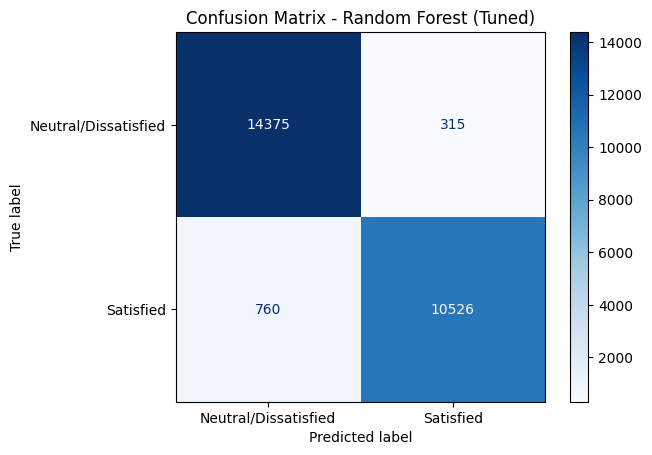

In [35]:
# Buat confusion matrix
cm = confusion_matrix(y_test, y_pred, labels=["neutral or dissatisfied", "satisfied"])

# Plot
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Neutral/Dissatisfied", "Satisfied"])
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix - Random Forest (Tuned)")
plt.show()

**Kesimpulan Bab 8 – Model Evaluation**

Evaluasi model Random Forest hasil *hyperparameter tuning* pada data uji menghasilkan metrik sebagai berikut:

- **Accuracy**: 95,86%
- **Precision (satisfied)**: 97,09%
- **Recall (satisfied)**: 93,27%
- **F1-Score (satisfied)**: 95,14%

**Confusion Matrix (ringkasan):**
- True Negative (TN): 14375
- False Positive (FP): 315
- False Negative (FN): 760
- True Positive (TP): 10526

Dari perspektif bisnis maskapai:
- **Fokus utama** adalah meminimalkan *false positive*, yaitu kasus di mana penumpang yang sebenarnya tidak puas diprediksi puas.
- Dengan precision 97,09%, model mampu menjaga tingkat kesalahan *false positive* pada level rendah (2,91%).
- Hal ini penting agar maskapai tidak keliru menganggap pelanggan sudah puas padahal sebenarnya mereka berpotensi memberikan keluhan atau pengalaman negatif.
- Recall yang relatif tinggi (93,27%) menunjukkan bahwa mayoritas penumpang puas tetap berhasil diidentifikasi, meskipun fokus utama bukan di recall.

Secara keseluruhan, model memberikan keseimbangan yang baik antara menekan *false positive* dan mempertahankan kemampuan identifikasi penumpang puas.

---

# 9. Model Saving

Tahap terakhir dalam proyek ini adalah menyimpan model terbaik beserta seluruh proses *preprocessing* ke dalam sebuah **pipeline**. Pipeline ini memastikan bahwa data mentah yang masuk akan melewati semua tahapan *Feature Engineering* yang telah diterapkan sebelumnya sebelum akhirnya diprediksi oleh model.

Keuntungan penggunaan pipeline:
- **Reproduksibilitas**: Semua langkah preprocessing dan model tersimpan dalam satu objek, sehingga mengurangi risiko ketidaksesuaian proses saat *inference*.
- **Kemudahan penggunaan**: Pipeline dapat langsung digunakan pada data mentah tanpa perlu melakukan preprocessing manual.
- **Konsistensi**: Menjamin bahwa data latih dan data baru diproses dengan cara yang sama.

Pipeline yang dibangun akan mencakup:
1. **Handling Missing Values** (termasuk imputasi MNAR pada kolom delay dengan nilai 0).
2. **Encoding** untuk fitur kategorikal nominal menggunakan *One-Hot Encoding*.
3. **Feature Scaling** pada fitur numerik menggunakan *StandardScaler*.
4. **Cardinality Handling** (*Binning*) untuk fitur *Age*, *Flight Distance*, dan *Delay*.
5. **Feature Selection** untuk menghapus kolom yang tidak digunakan.
6. **Model terbaik** hasil *hyperparameter tuning*: **Random Forest** dengan parameter optimal yang telah ditemukan.

Pada tahap ini, model yang telah melalui proses pelatihan dan seluruh tahapan *feature engineering* akan disimpan dalam bentuk pipeline menggunakan `cloudpickle`.  
Keunggulan `cloudpickle` dibandingkan `joblib` dalam konteks ini adalah kemampuannya untuk menyimpan definisi fungsi kustom yang digunakan pada tahap *feature engineering*, sehingga saat proses *inference* atau *deployment* model di lingkungan berbeda, kita tidak perlu lagi mendefinisikan ulang fungsi-fungsi tersebut.  

Pipeline yang disimpan akan memuat:
- Seluruh langkah *feature engineering* (imputasi, encoding, binning, scaling, dll)
- Model `Random Forest` dengan parameter terbaik hasil *hyperparameter tuning*
- Struktur kolom yang sesuai dengan dataset mentah asli

Dengan demikian, file `.pkl` hasil penyimpanan ini dapat langsung digunakan untuk memproses data mentah hingga menghasilkan prediksi.


## 9.1 Custom Function untuk Feature Engineering

In [31]:
# Imputasi MNAR Delay dengan nilai 0
def fill_delay_zero(df):
    delay_cols = [col for col in df.columns if "Delay" in col]
    for col in delay_cols:
        df[col] = pd.to_numeric(df[col], errors='coerce')
    df[delay_cols] = df[delay_cols].fillna(0)
    return df

# Mengganti nilai 0 pada skala ordinal numerik dengan modus dari 1–5
def replace_ordinal_zeros(df):
    ordinal_survey_cols = [
        "Inflight wifi service",
        "Departure/Arrival time convenient",
        "Ease of Online booking",
        "Gate location",
        "Food and drink",
        "Online boarding",
        "Seat comfort",
        "Inflight entertainment",
        "On-board service",
        "Leg room service",
        "Baggage handling",
        "Checkin service",
        "Inflight service",
        "Cleanliness"
    ]
    for col in ordinal_survey_cols:
        if col in df.columns:
            mode_val = df.loc[df[col] != 0, col].mode()[0]
            df[col] = df[col].replace(0, mode_val)
    return df

# Binning untuk Age, Flight Distance, Delay
def bin_features(df):
    if 'Age' in df.columns:
        df['Age'] = pd.to_numeric(df['Age'], errors='coerce')
        df['Age'] = pd.cut(df['Age'], bins=[0, 18, 30, 50, 100], 
                           labels=['Teen', 'Young Adult', 'Adult', 'Senior'])
    
    if 'Flight Distance' in df.columns:
        df['Flight Distance'] = pd.to_numeric(df['Flight Distance'], errors='coerce')
        df['Flight Distance'] = pd.cut(df['Flight Distance'], bins=[0, 1000, 3000, 5000, np.inf], 
                                       labels=['Short', 'Medium', 'Long', 'Very Long'])
    
    delay_cols = [col for col in df.columns if "Delay" in col]
    if delay_cols:
        for col in delay_cols:
            df[col] = pd.to_numeric(df[col], errors='coerce')
        df['Total Delay'] = df[delay_cols].sum(axis=1)
        df['Total Delay'] = pd.cut(df['Total Delay'], bins=[-1, 0, 30, 60, np.inf], 
                                   labels=['No Delay', 'Short Delay', 'Moderate Delay', 'Long Delay'])
    return df

# ==== FunctionTransformer wrapper ====
fill_delay_transformer = FunctionTransformer(fill_delay_zero)
replace_ordinal_transformer = FunctionTransformer(replace_ordinal_zeros)
binning_transformer = FunctionTransformer(bin_features)

# ==== Preprocessor ====
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', OneHotEncoder(handle_unknown='ignore'))
])

numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

preprocessor = ColumnTransformer(transformers=[
    ('cat', categorical_transformer, make_column_selector(dtype_include=['category', 'object'])),
    ('num', numeric_transformer, make_column_selector(dtype_include=np.number))
])

# ==== Final Pipeline ====
pipeline = Pipeline(steps=[
    ('fill_delay', fill_delay_transformer),
    ('replace_ordinal_zeros', replace_ordinal_transformer),
    ('binning', binning_transformer),
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(
        n_estimators=300,
        min_samples_split=10,
        min_samples_leaf=1,
        max_features='sqrt',
        max_depth=30,
        bootstrap=False,
        random_state=42
    ))
])

# ==== Fit Pipeline ====
pipeline.fit(X_train, y_train)

# ==== Save Pipeline dengan cloudpickle + gzip ====
with gzip.open('rf_pipeline_model.pkl.gz', 'wb') as f:
    cloudpickle.dump(pipeline, f)

print("Pipeline berhasil disimpan dengan cloudpickle + gzip sebagai 'rf_pipeline_model.pkl.gz'")

Pipeline berhasil disimpan dengan cloudpickle + gzip sebagai 'rf_pipeline_model.pkl.gz'


---

# 10. Model Inference

Tahap ini bertujuan untuk menguji kemampuan model yang telah disimpan dalam format `.pkl.gz` untuk melakukan prediksi pada data baru di luar dataset training. Proses dilakukan pada notebook terpisah khusus inference, yang memuat langkah-langkah berikut:

1. **Load model pipeline** menggunakan `cloudpickle` dan `gunzip` agar fungsi-fungsi custom yang digunakan dalam feature engineering dapat dikenali.
2. **Menyiapkan data mentah baru** dengan format kolom yang sama seperti pada data training sebelum preprocessing.
3. **Melakukan prediksi** baik untuk satu sampel maupun data dalam jumlah besar (*batch dataset*).
4. **Verifikasi hasil prediksi**, yang pada uji awal menghasilkan label **satisfied** untuk sampel data uji.

Hasil ini menunjukkan bahwa **pipeline bekerja dengan baik di luar notebook training**, dan seluruh proses preprocessing hingga prediksi dapat dijalankan otomatis hanya dengan memanggil `pipeline.predict()`. Dengan format ini, model siap untuk di-*deploy* ke lingkungan produksi seperti Hugging Face atau API service lainnya.

---

# 11. Pengambilan Kesimpulan

### Kesimpulan
Berdasarkan hasil eksperimen yang dilakukan pada dataset kepuasan penumpang maskapai, dapat disimpulkan bahwa:

1. **Model terbaik** yang diperoleh adalah Random Forest Classifier dengan hasil hyperparameter tuning menghasilkan:
   - `n_estimators`: 300  
   - `max_depth`: 30  
   - `max_features`: 'sqrt'  
   - `min_samples_split`: 10  
   - `min_samples_leaf`: 1  
   - `bootstrap`: False  
   
2. Model memberikan performa yang tinggi pada data uji, dengan ***akurasi*** sekitar `95,78%` pada **data train** dan `95,86%` pada **data test**, serta ***precision*** tinggi khususnya pada kelas *Satisfied*, yang penting untuk mengurangi *false positive* pada kelas *Neutral/Dissatisfied*.

3. Pipeline yang dibangun mampu menangani **feature engineering** (imputasi nilai delay, penggantian nilai 0 pada skala ordinal, binning variabel numerik) serta **preprocessing** (imputasi, encoding, scaling) secara otomatis, sehingga proses inference pada data mentah menjadi sederhana dan efisien.

4. Model yang telah disimpan dalam format `.pkl` menggunakan `cloudpickle` dapat dijalankan di luar lingkungan training, memungkinkan implementasi pada platform deployment seperti Hugging Face atau API service.

### Rekomendasi
1. **Penggunaan di Produksi**  
   Model dapat digunakan oleh maskapai untuk memprediksi kepuasan penumpang secara real-time atau batch, sehingga pihak manajemen dapat segera mengetahui tren kepuasan dan mengambil tindakan perbaikan layanan.

2. **Pemantauan dan Pemeliharaan Model**  
   - Secara berkala lakukan evaluasi ulang performa model untuk memastikan relevansi prediksi seiring dengan perubahan perilaku penumpang atau layanan maskapai.
   - Lakukan retraining jika ditemukan penurunan performa signifikan.

3. **Pengembangan Lanjutan**  
   - Menambahkan variabel eksternal seperti cuaca, jadwal penerbangan, dan faktor musiman untuk meningkatkan akurasi prediksi.
   - Menguji algoritma lain atau teknik ensemble yang lebih kompleks seperti XGBoost untuk membandingkan hasil.

Dengan adanya model ini, diharapkan maskapai dapat lebih proaktif dalam meningkatkan kualitas layanan dan mempertahankan loyalitas pelanggan melalui pendekatan berbasis data.

---